# Example usage of Mahjong Heatmap

### Preface

The code you are currently reading was originally designed for visualizing [Japanese Mahjong board states](https://www.kaggle.com/datasets/trongdt/japanese-mahjong-board-states), and is used in my thesis: ["A Supervised Attention-Based Multiclass Classifier for Tile Discarding in Japanese Mahjong"](https://hdl.handle.net/11250/2823898). The code has since been improved for future use. 

If you choose to use it in your works, be it academic or personal work, it would mean a lot to me if you credited my code in your works.


### Notes
The examples shown in this notebook uses a 15x34 matrix as input, but this can be customized and is up to the individual.

In [1]:
import numpy as np
np.random.seed(seed=69)

import seaborn as sns

# How to import necessary code
from mahjong_heatmap import generate_mahjong_heatmap

### Example: Mahjong Board State

The code can be used to visualize a given Mahjong board.

<img src="resources/tenhou_example.png" alt="Tenhou Game" width="500"/>

This above Mahjong board state can be viewed in the Tenhou client via: https://tenhou.net/5/?log=2018052710gm-00a9-0000-863640fd&tw=0&ts=9&tj=61.

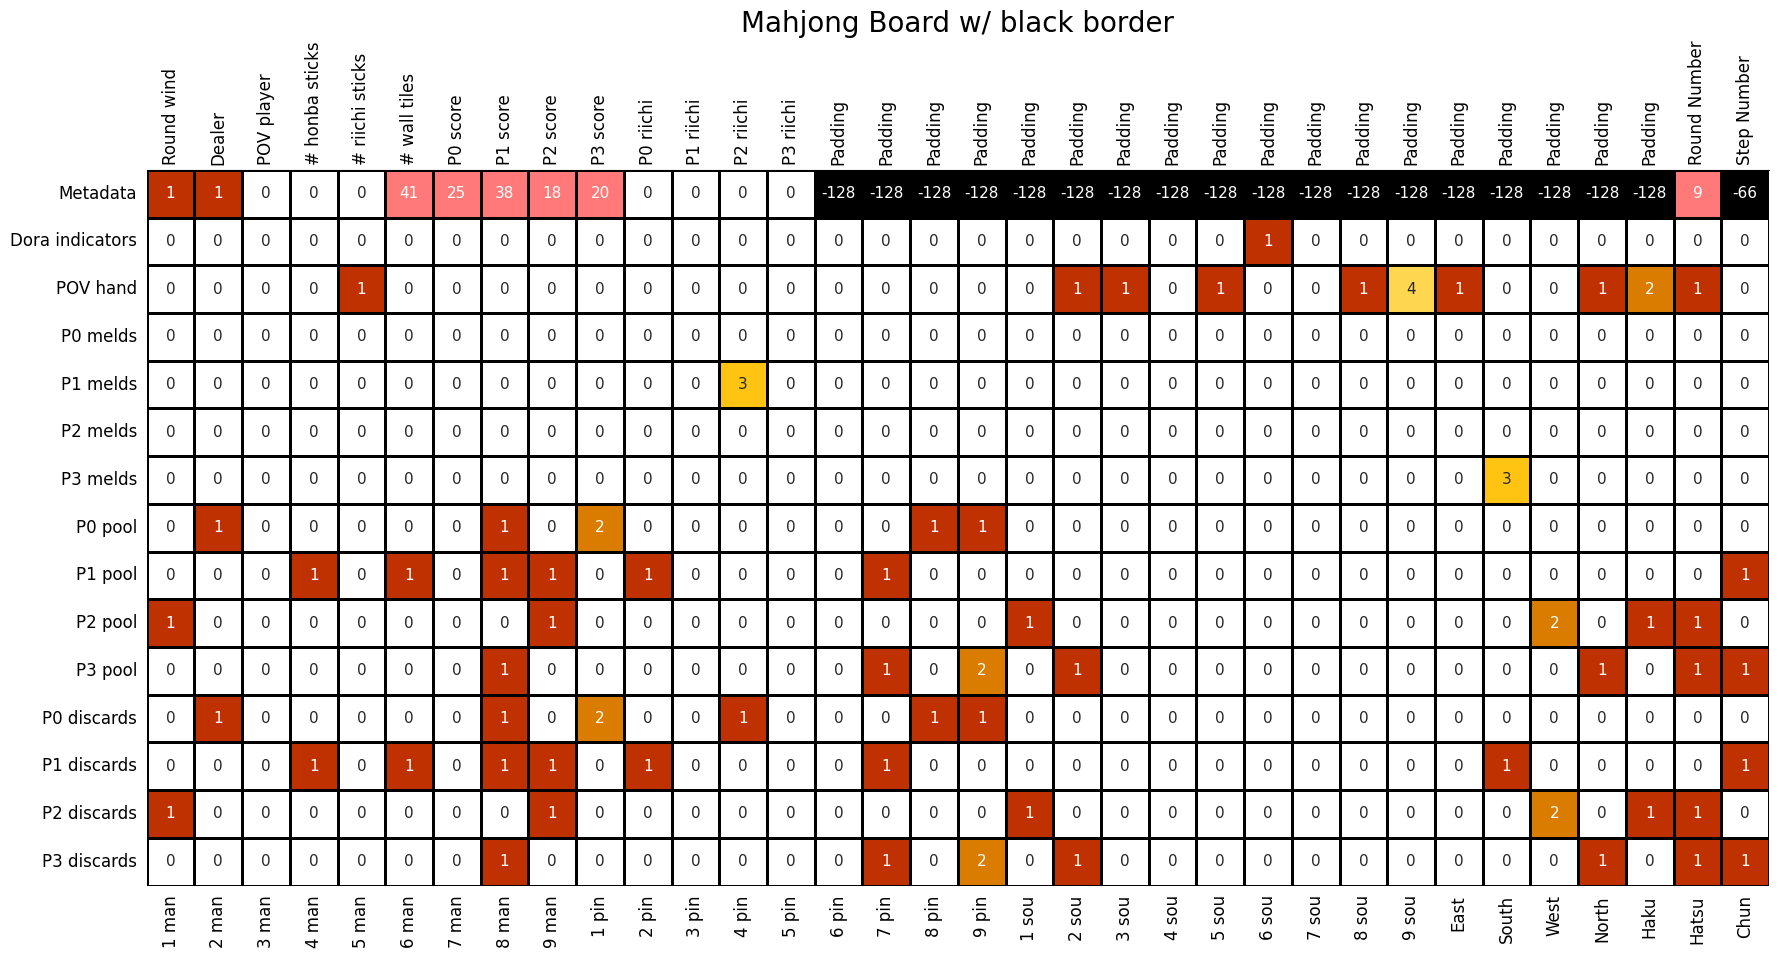

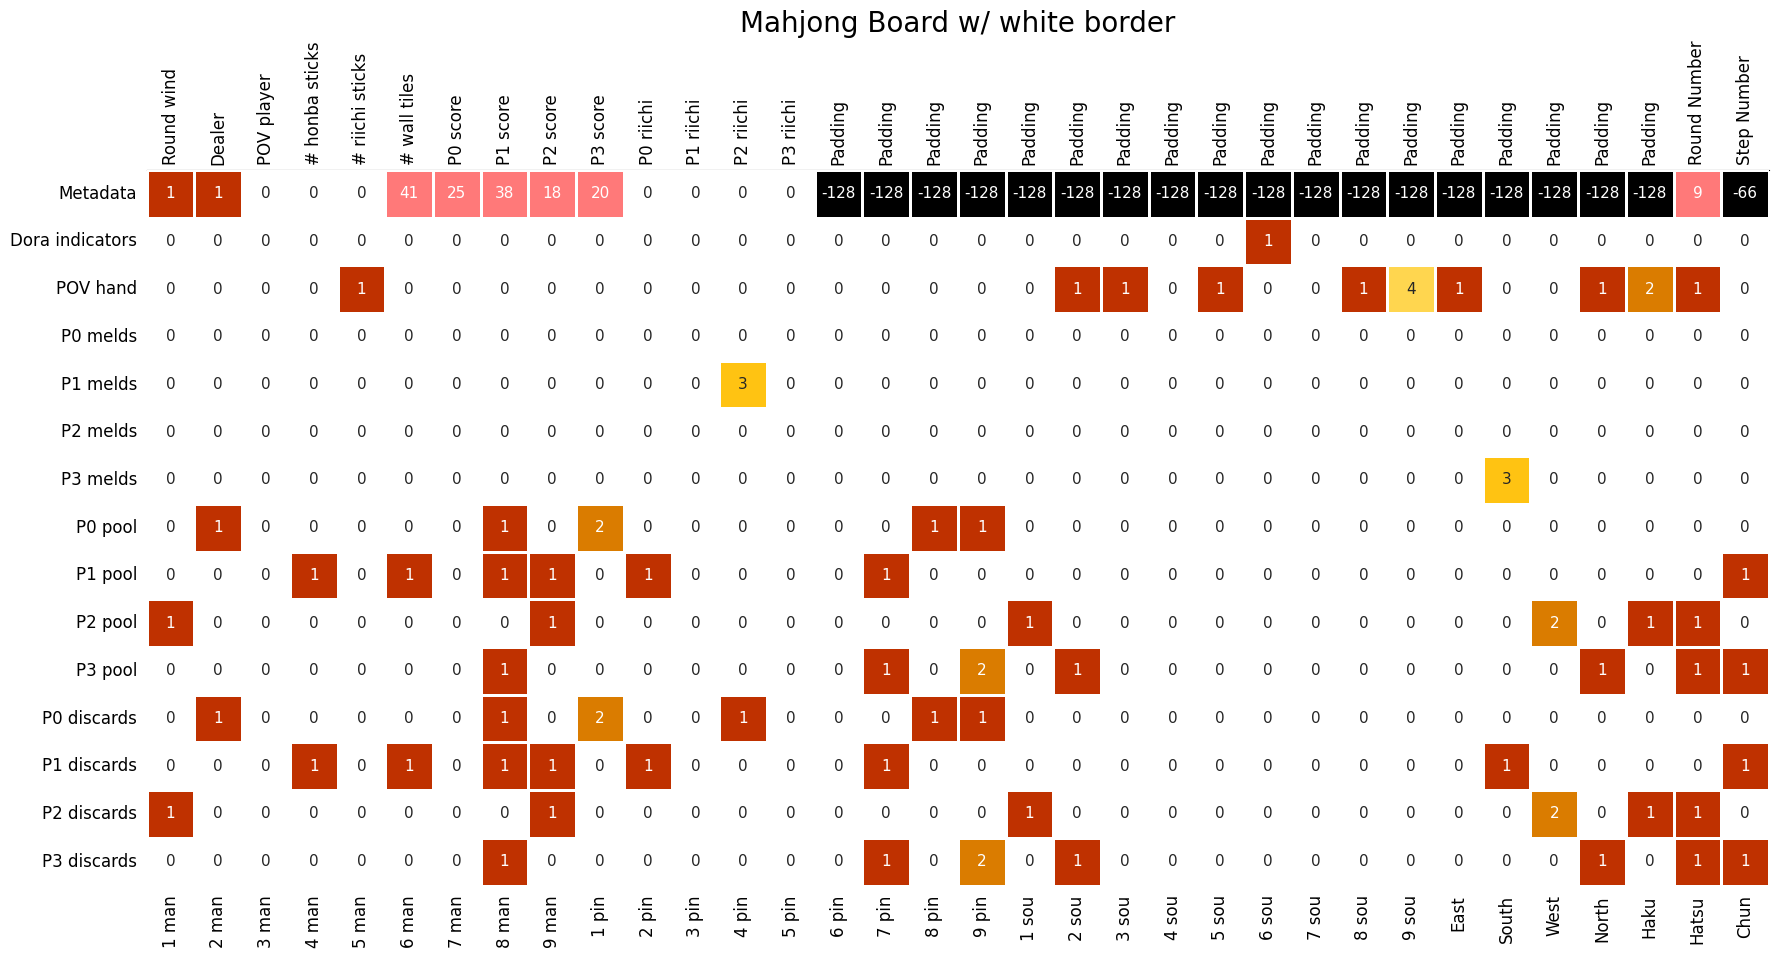

In [2]:
# From `./discard_datasets/2018/2018052710gm-00a9-0000-863640fd.npz` in https://www.kaggle.com/datasets/trongdt/japanese-mahjong-board-states
mock_matrix = np.array([
    [   1,    1,    0,    0,    0,   41,   25,   38,   18,   20,    0,    0,    0,    0, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128,    9,  -66],
    [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
    [   0,    0,    0,    0,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,    1,    0,    1,    0,    0,    1,    4,    1,    0,    0,    1,    2,    1,    0],
    [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
    [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    3,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
    [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
    [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    3,    0,    0,    0,    0,    0],
    [   0,    1,    0,    0,    0,    0,    0,    1,    0,    2,    0,    0,    0,    0,    0,    0,    1,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
    [   0,    0,    0,    1,    0,    1,    0,    1,    1,    0,    1,    0,    0,    0,    0,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1],
    [   1,    0,    0,    0,    0,    0,    0,    0,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    2,    0,    1,    1,    0],
    [   0,    0,    0,    0,    0,    0,    0,    1,    0,    0,    0,    0,    0,    0,    0,    1,    0,    2,    0,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,    0,    1,    1],
    [   0,    1,    0,    0,    0,    0,    0,    1,    0,    2,    0,    0,    1,    0,    0,    0,    1,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
    [   0,    0,    0,    1,    0,    1,    0,    1,    1,    0,    1,    0,    0,    0,    0,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,    0,    0,    0,    0,    1],
    [   1,    0,    0,    0,    0,    0,    0,    0,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    2,    0,    1,    1,    0],
    [   0,    0,    0,    0,    0,    0,    0,    1,    0,    0,    0,    0,    0,    0,    0,    1,    0,    2,    0,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,    0,    1,    1]], 
    dtype=np.int8)

for color in ["black", "white"]:
    generate_mahjong_heatmap(
        input_matrix=mock_matrix,
        title=f"Mahjong Board w/ {color} border",
        border_color=color,
        colormap="kaggle_mahjong",  # Custom colormap useful for this use-case
        output_path=f"./resources/kaggle_example_{color}"
    )

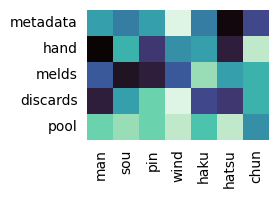

In [3]:
# README Logo creation
logo_matrix = np.array([
    [   1,    1,    0,    45,   -128 ],
    [   4,    3,    0,    2,    1 ],
    [   0,    0,    0,    0,    1 ],
    [   4,    0,    0,    0,    0 ],
    [   0,    4,    3,    25,    25 ]],
    dtype=np.int8)

generate_mahjong_heatmap(
    # input_matrix=logo_matrix,
    input_matrix=np.random.randint(low=-10, high=10, size=35).reshape(5, 7),
    figure_size=(3,6),
    annotation_fontsize=10,
    enable_annotation=False,
    label_fontsize=10,
    border_width=0,
    labels_top=[], #["Round Wind", "Dealer", "POV player", "# wall tiles", "riichi"],
    labels_left=["metadata", "hand", "melds", "discards", "pool"],
    labels_bottom=["man", "sou", "pin", "wind", "haku", "hatsu", "chun"],
    border_color="black",
    colormap="mako",  # Custom colormap useful for this use-case
    output_path=f"./resources/logo"
)

#### Example: Colorless heatmap
A colorless heatmap can be useful to present indices without distractions.

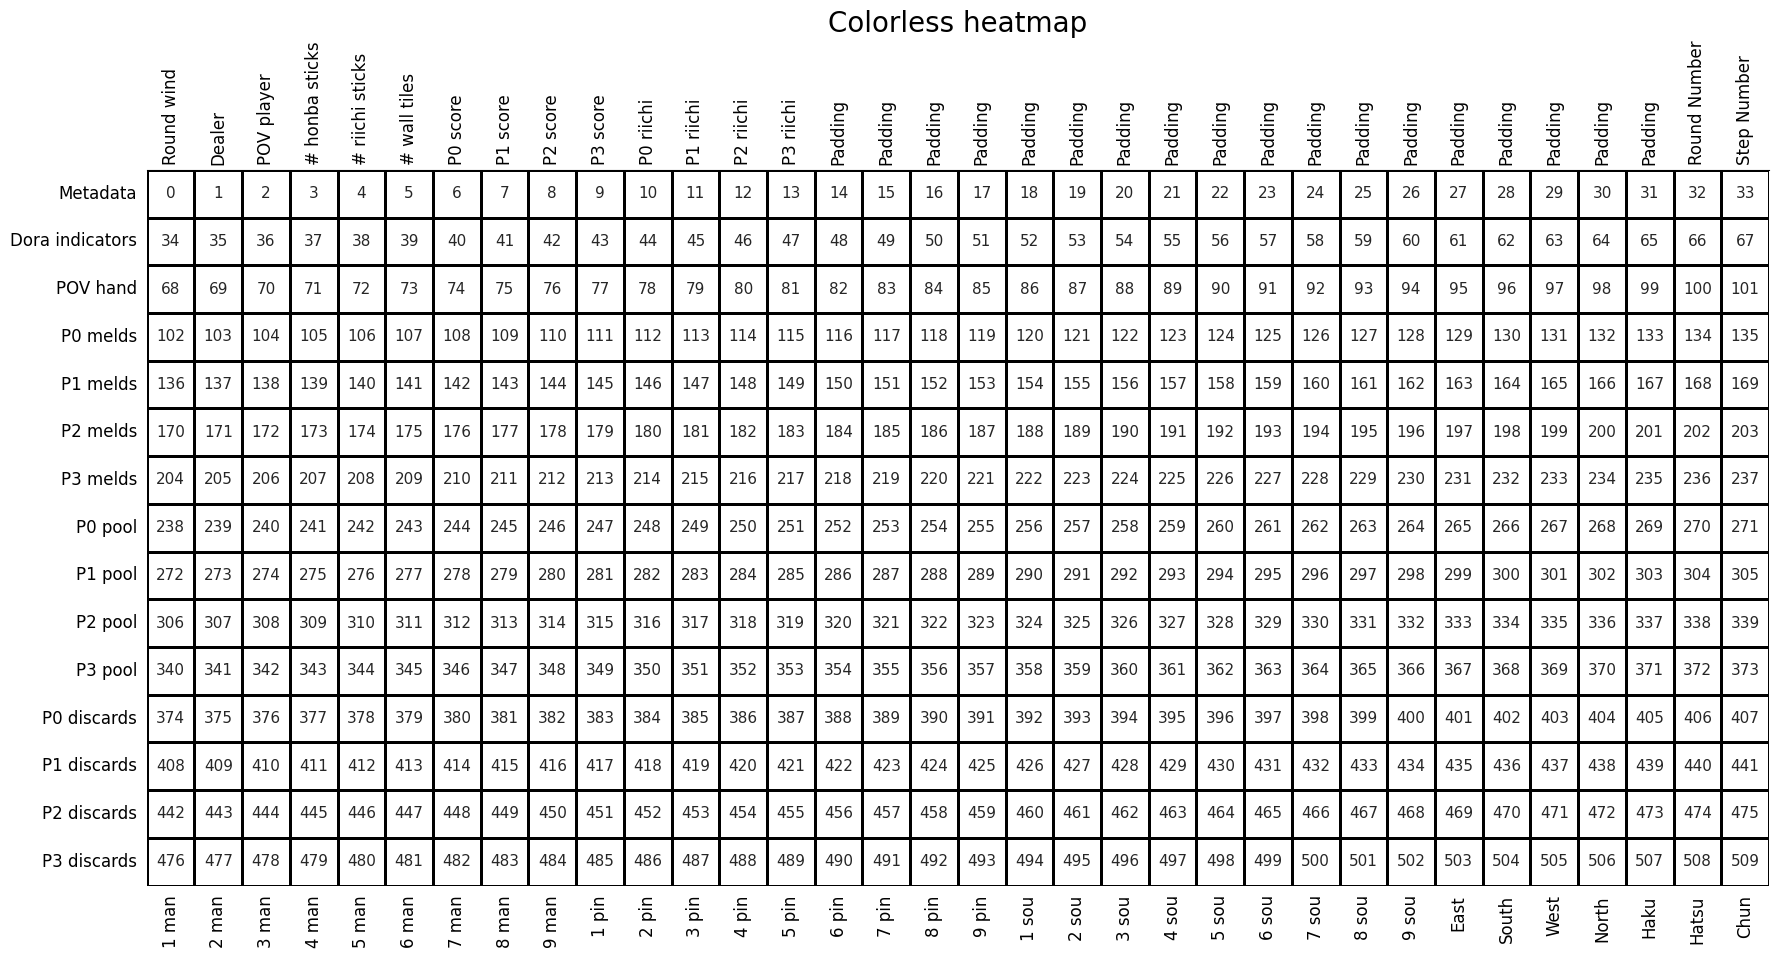

In [4]:
generate_mahjong_heatmap(
    input_matrix=np.arange(0, 510).reshape(15, 34),
    title="Colorless heatmap",
    colormap=sns.color_palette(["#FFFFFF"]),
)

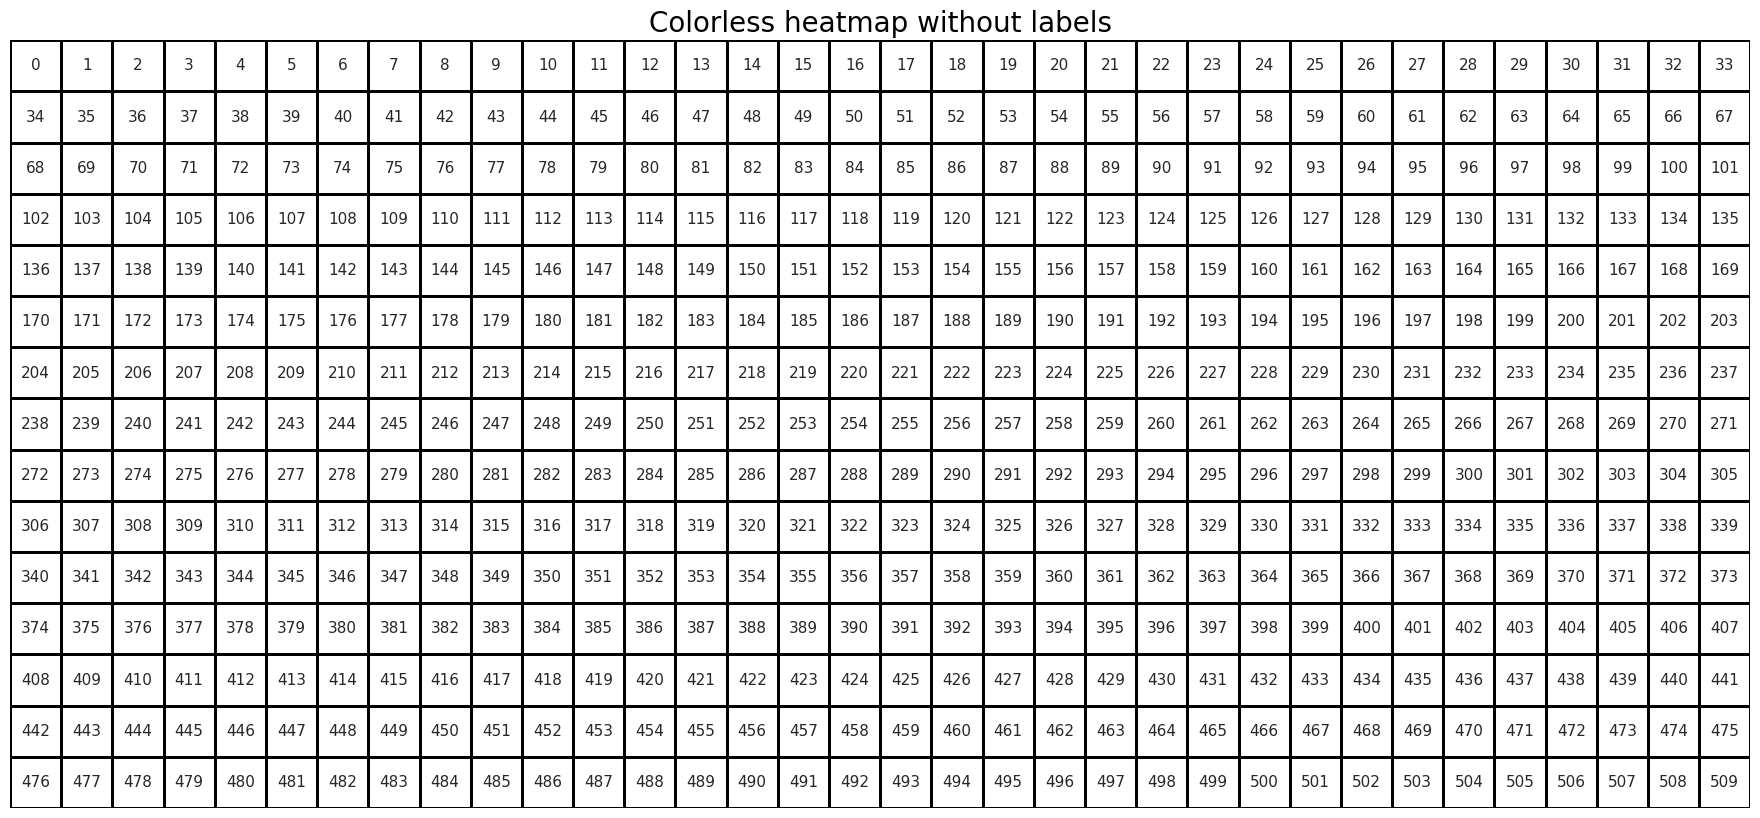

In [5]:
generate_mahjong_heatmap(
    input_matrix=np.arange(0, 510).reshape(15, 34),
    title="Colorless heatmap without labels",
    labels_top=[],
    labels_bottom=[],
    labels_left=[],
    colormap=sns.color_palette(["#FFFFFF"]),
)

### Example: Colorful Heatmaps

Seaborn comes with pre-defined colormaps that fits well with Mahjong Heatmap, e.g.:
- `icefire`
- `coolwarm`
- `Spectral`
- `vlag`
- `mako`

Good documentation on Seaborn's colormaps can be found here: https://r02b.github.io/seaborn_palettes/

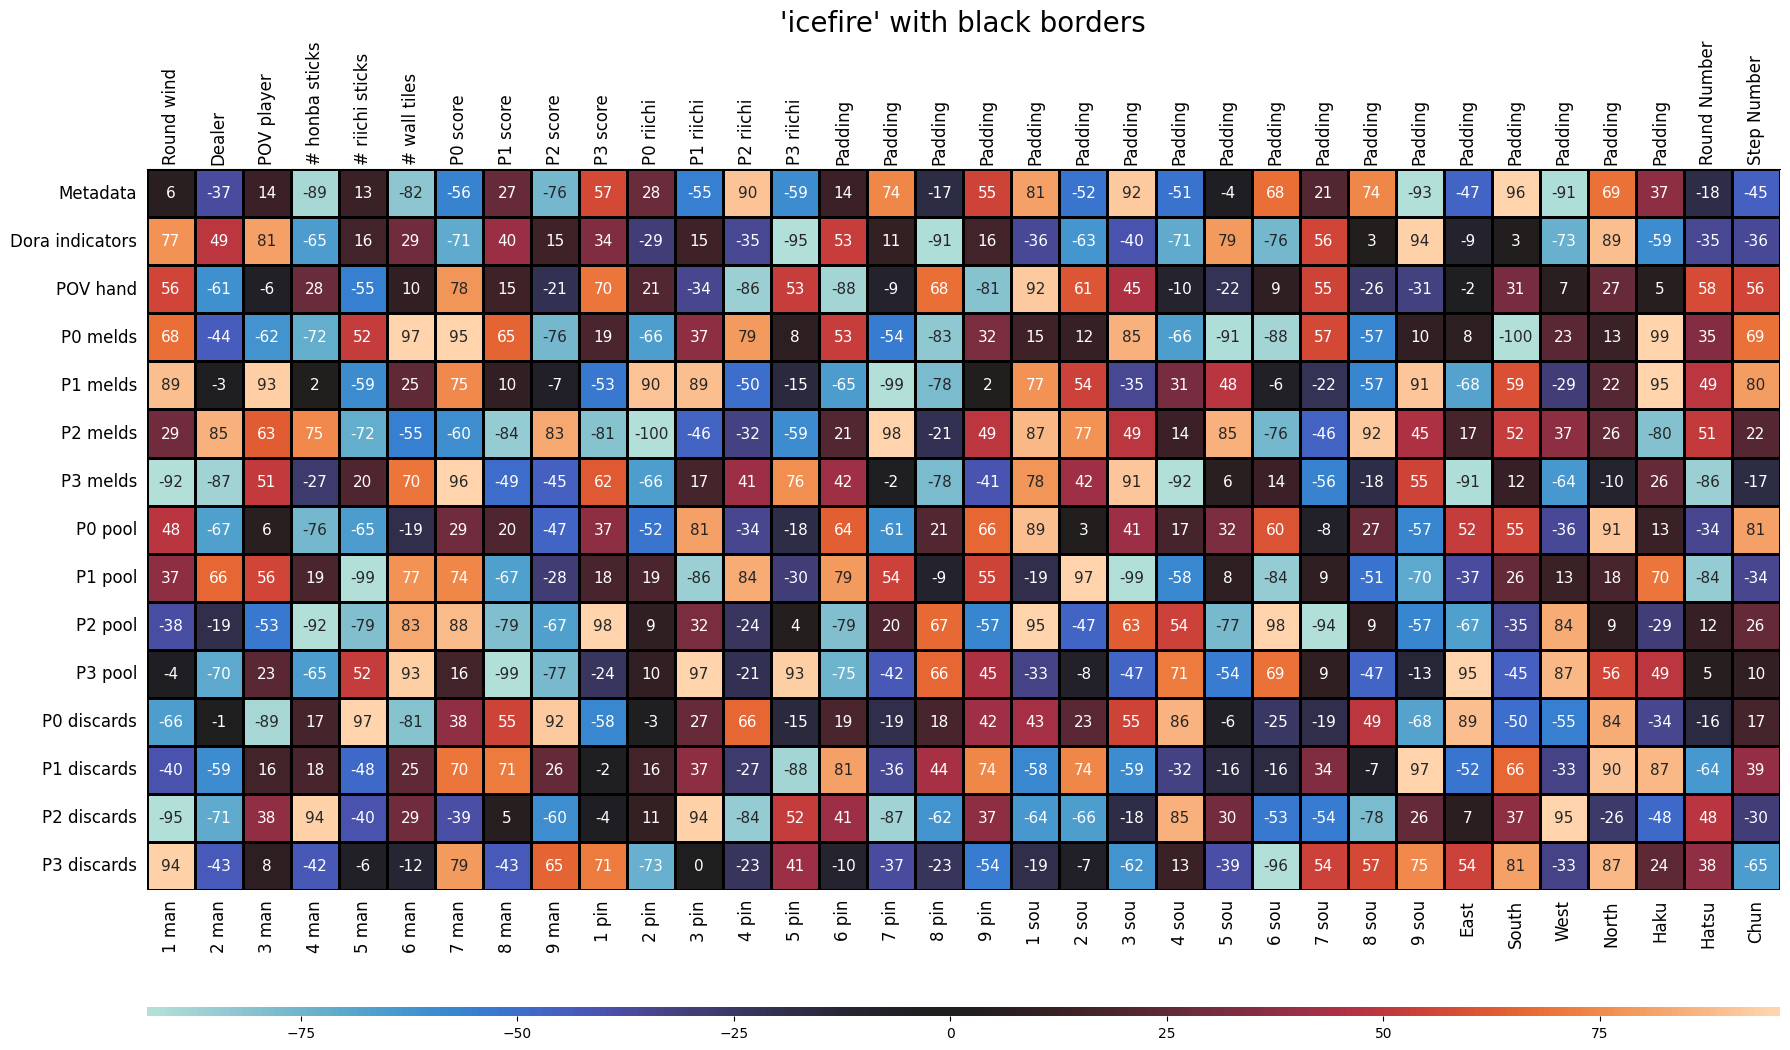

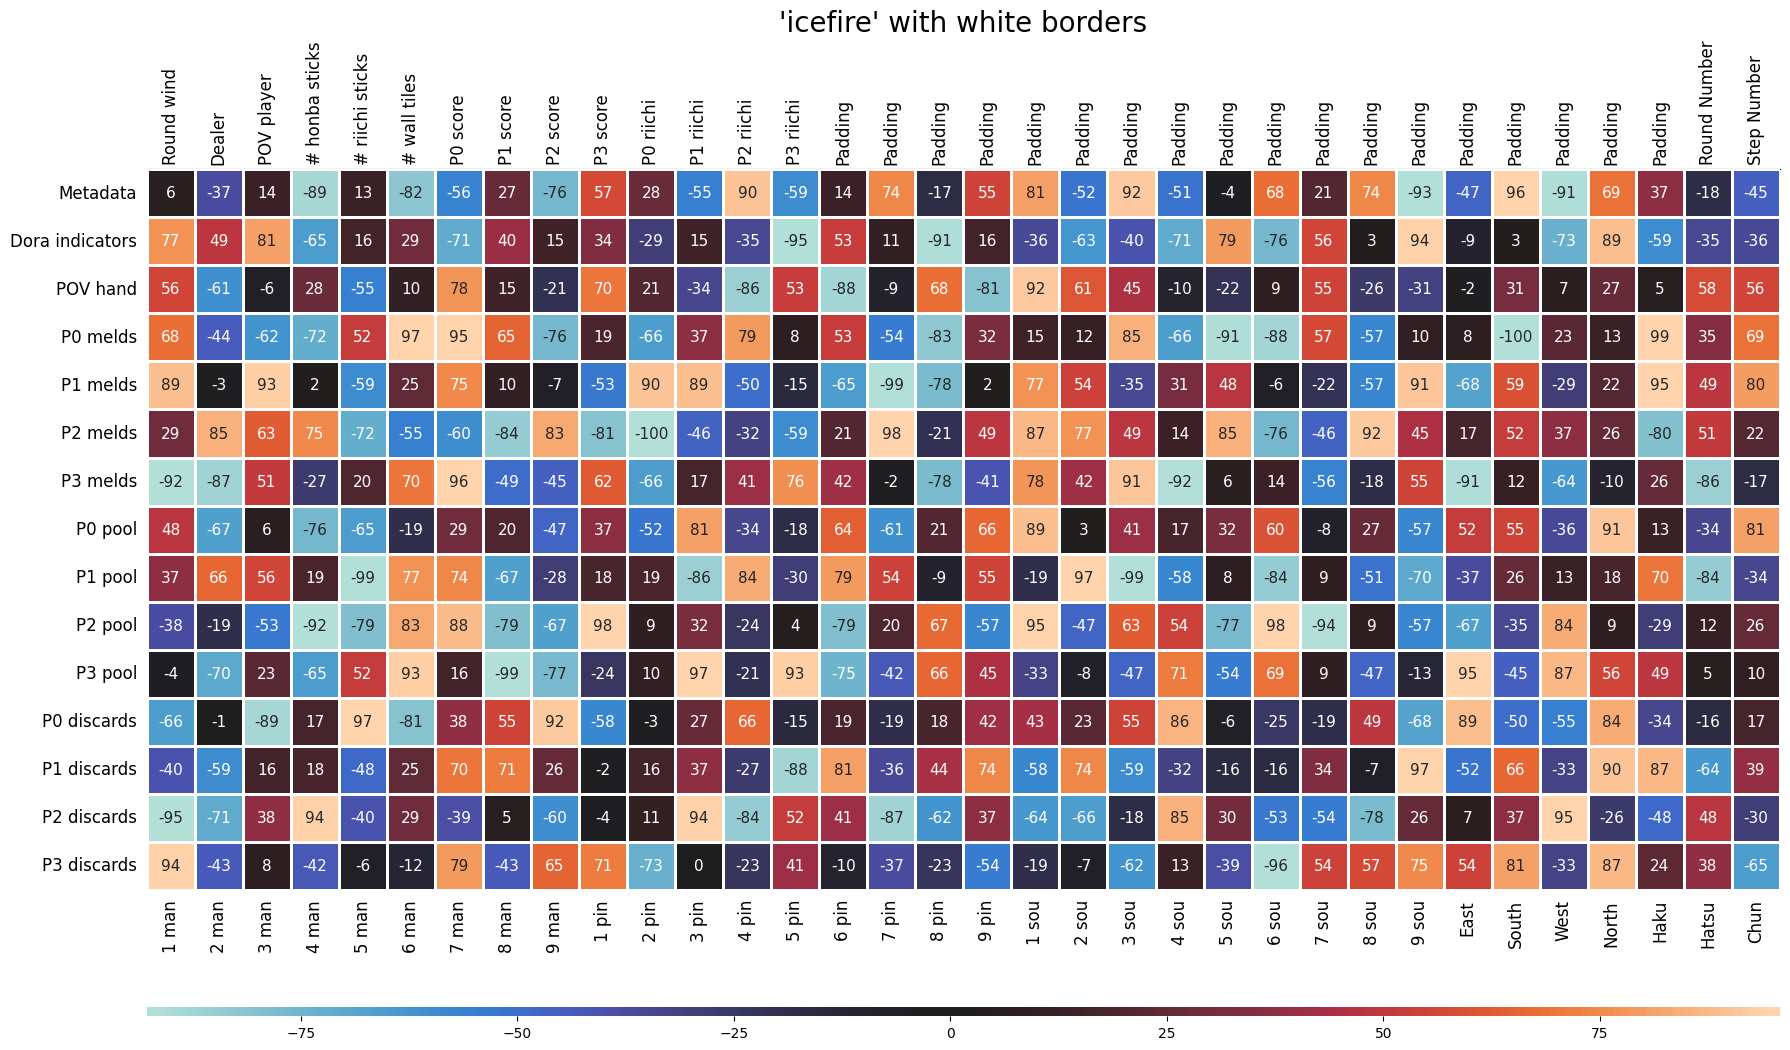

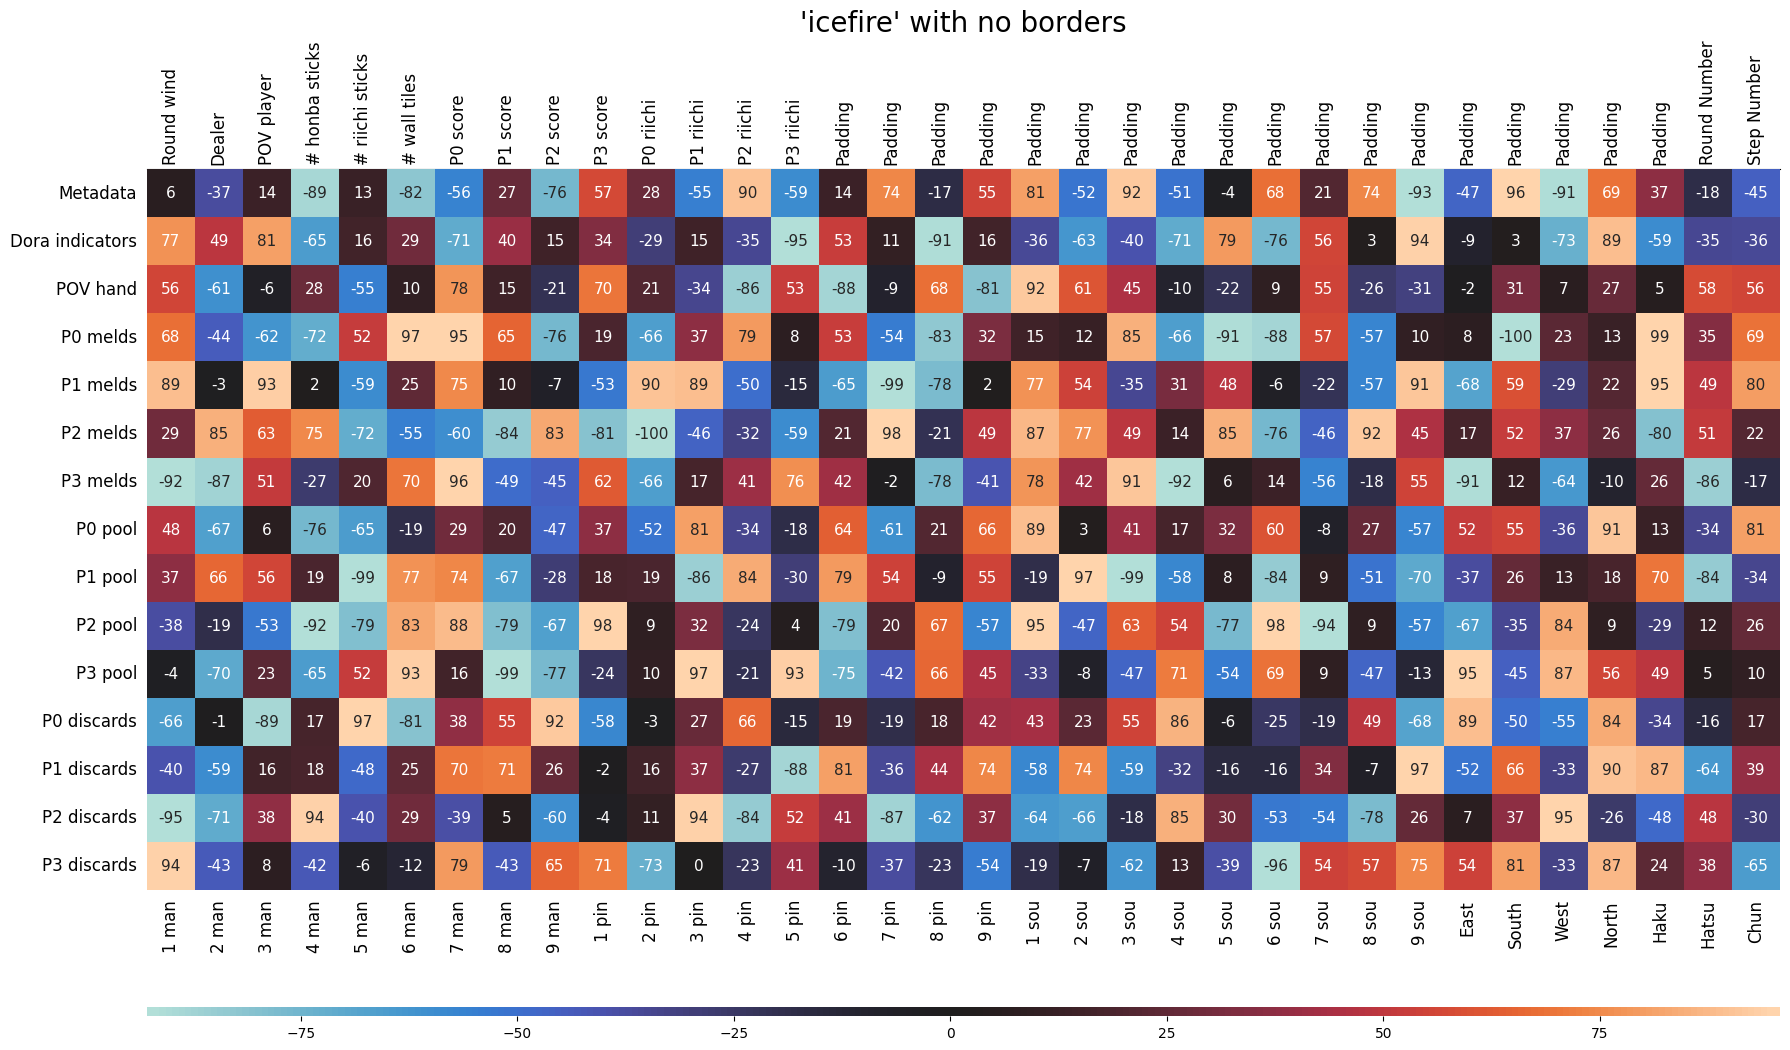

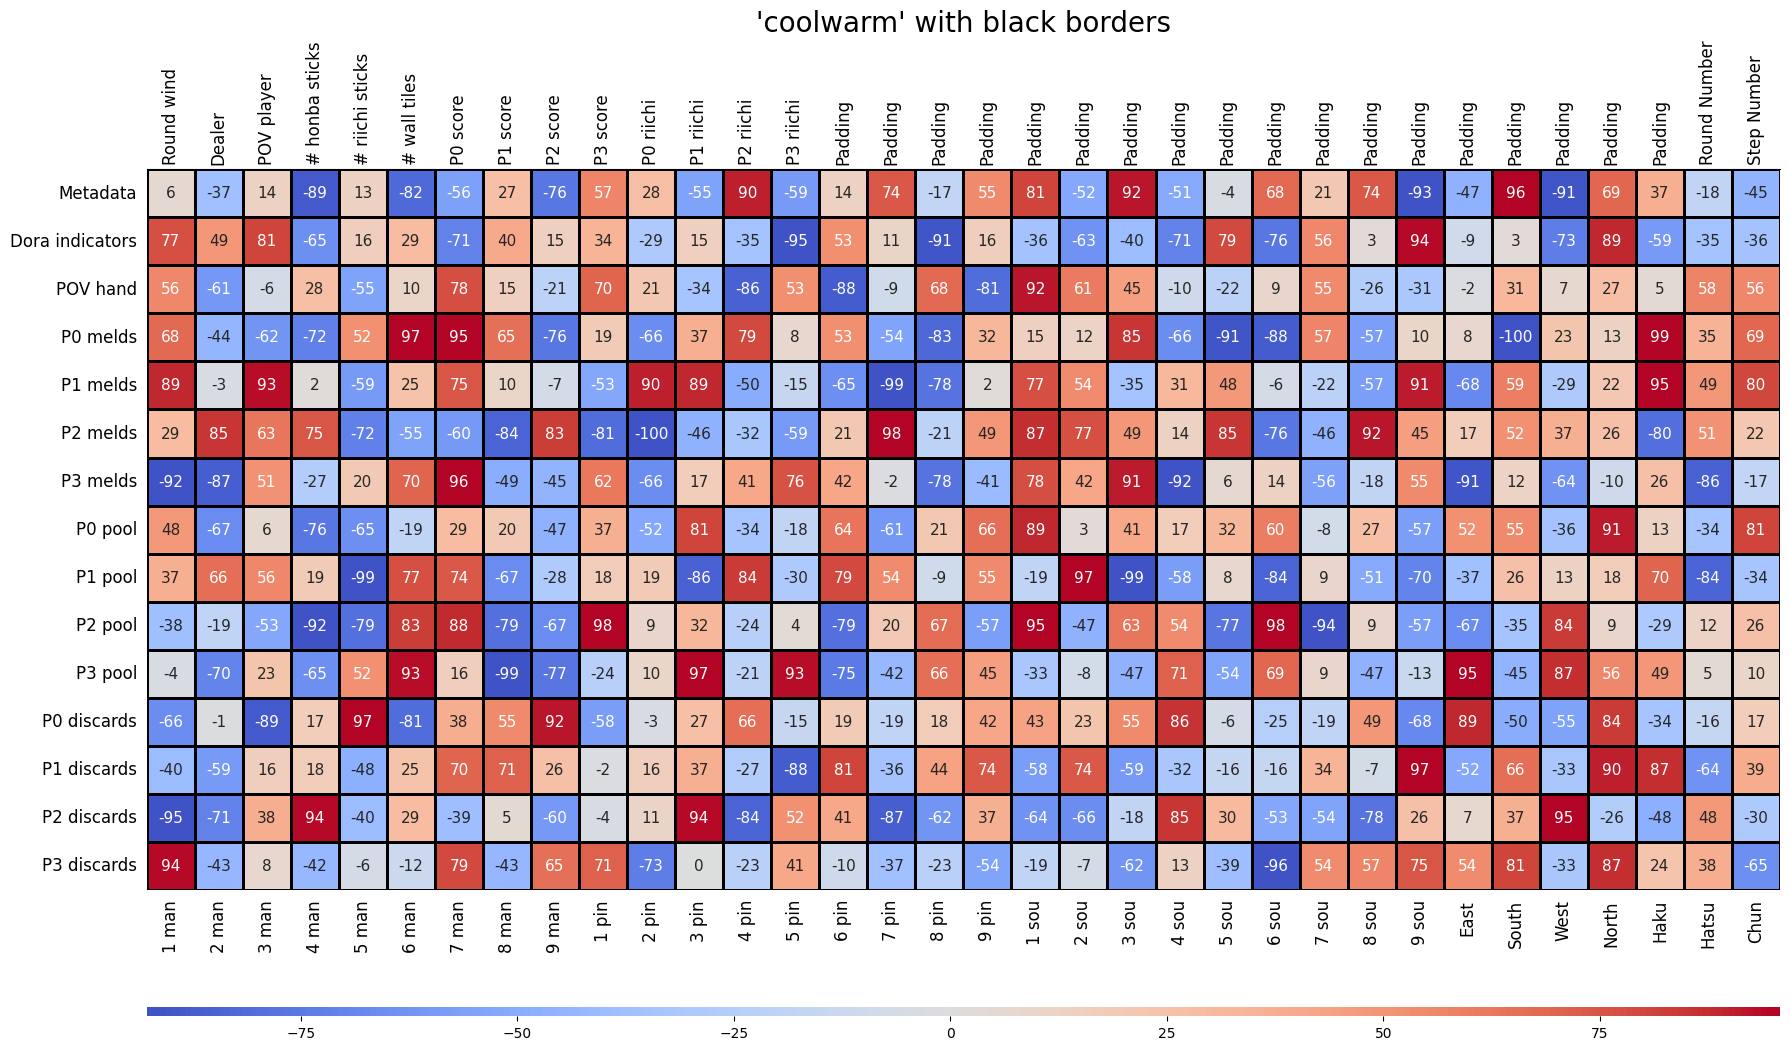

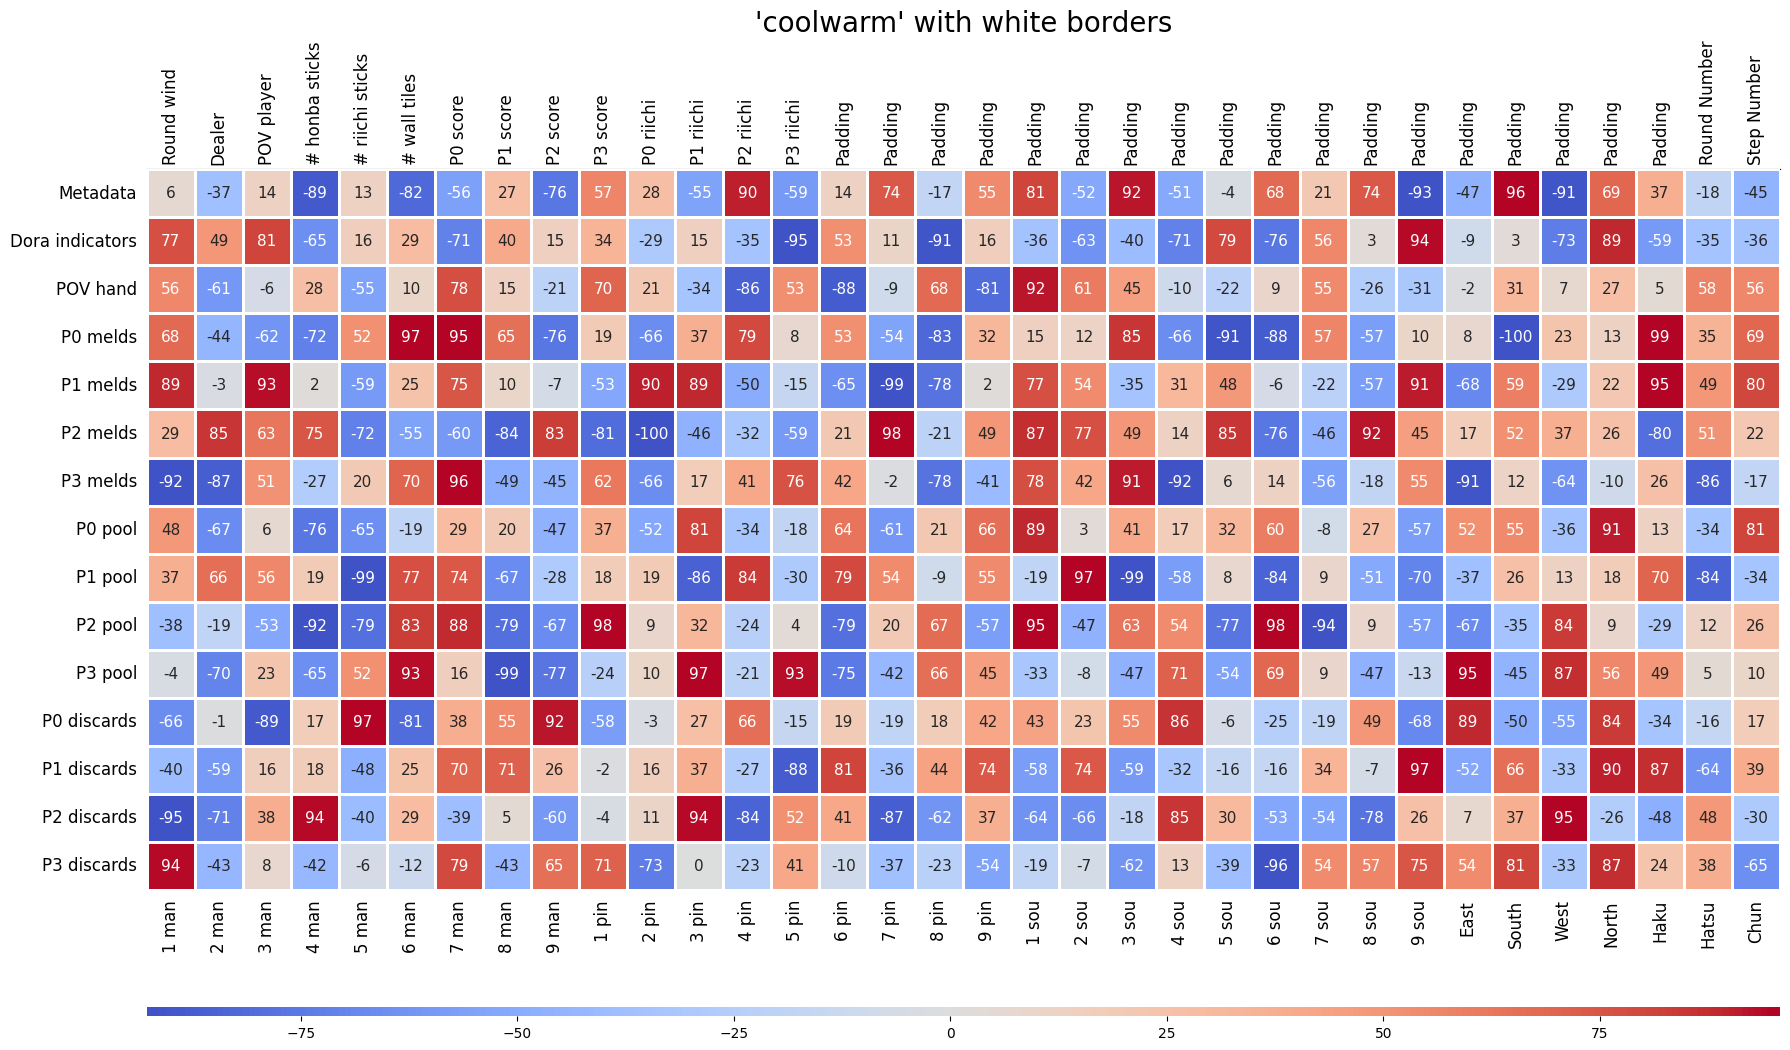

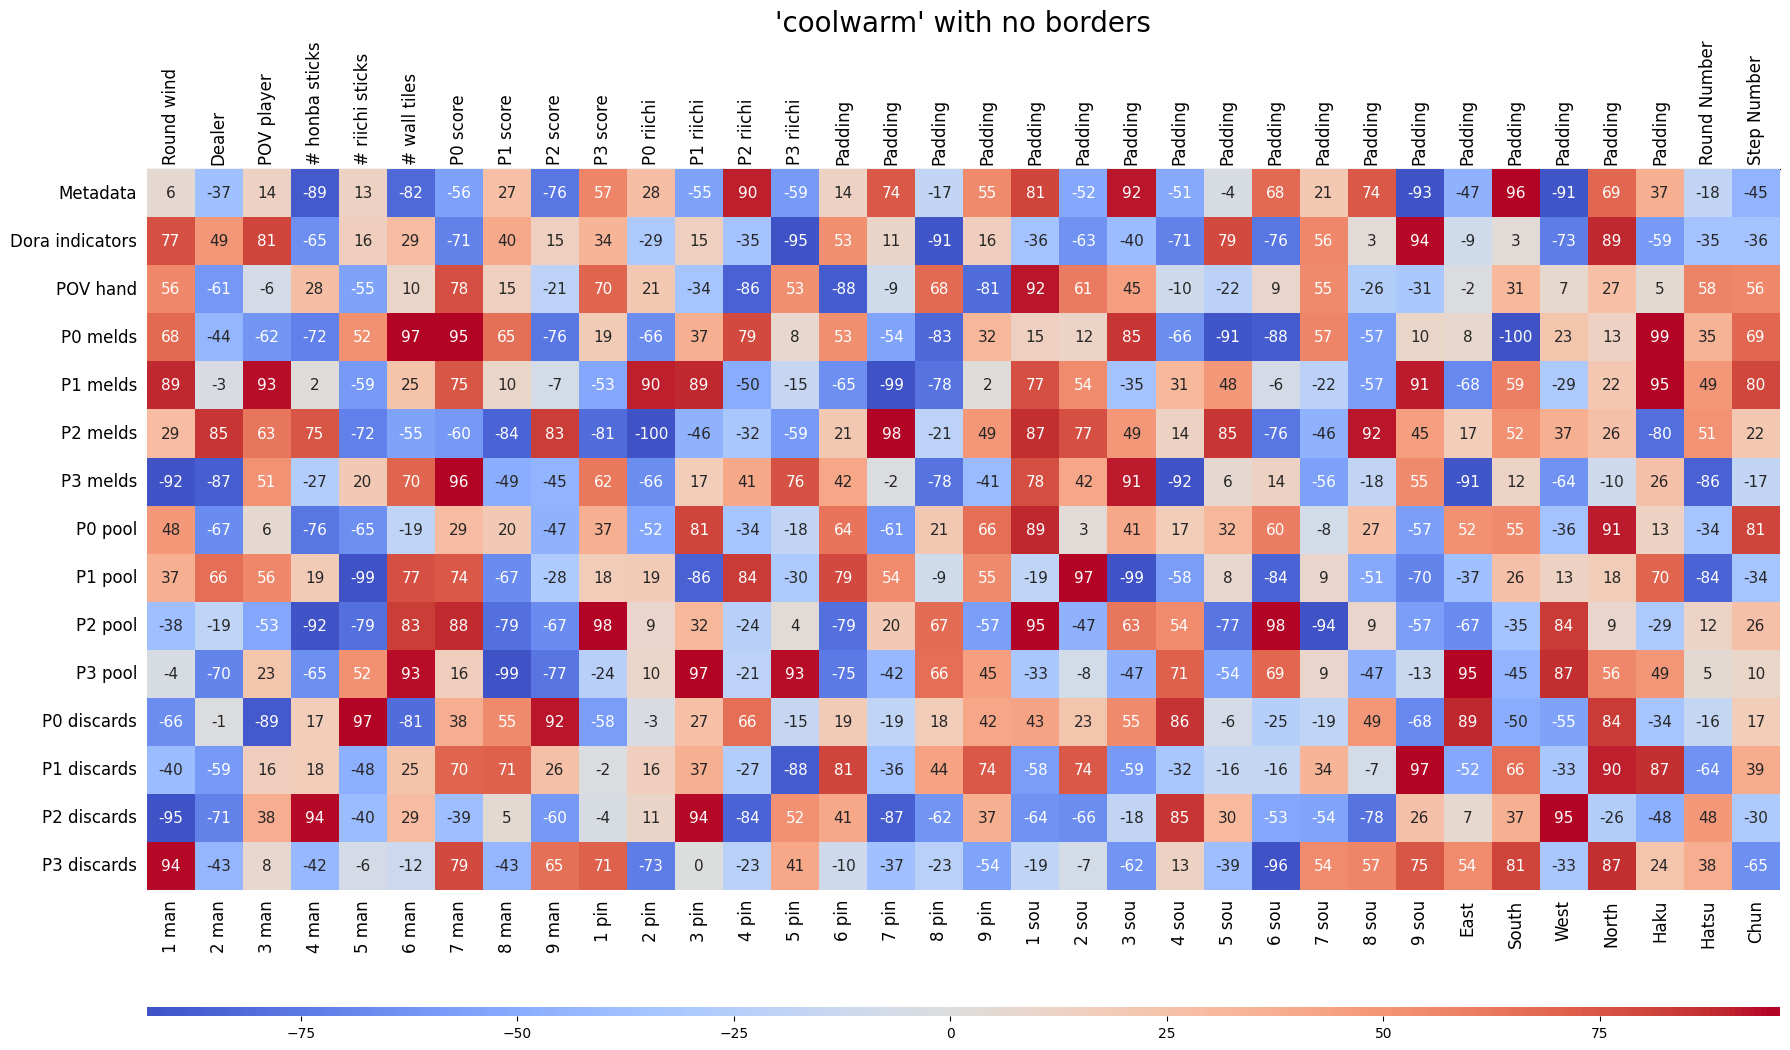

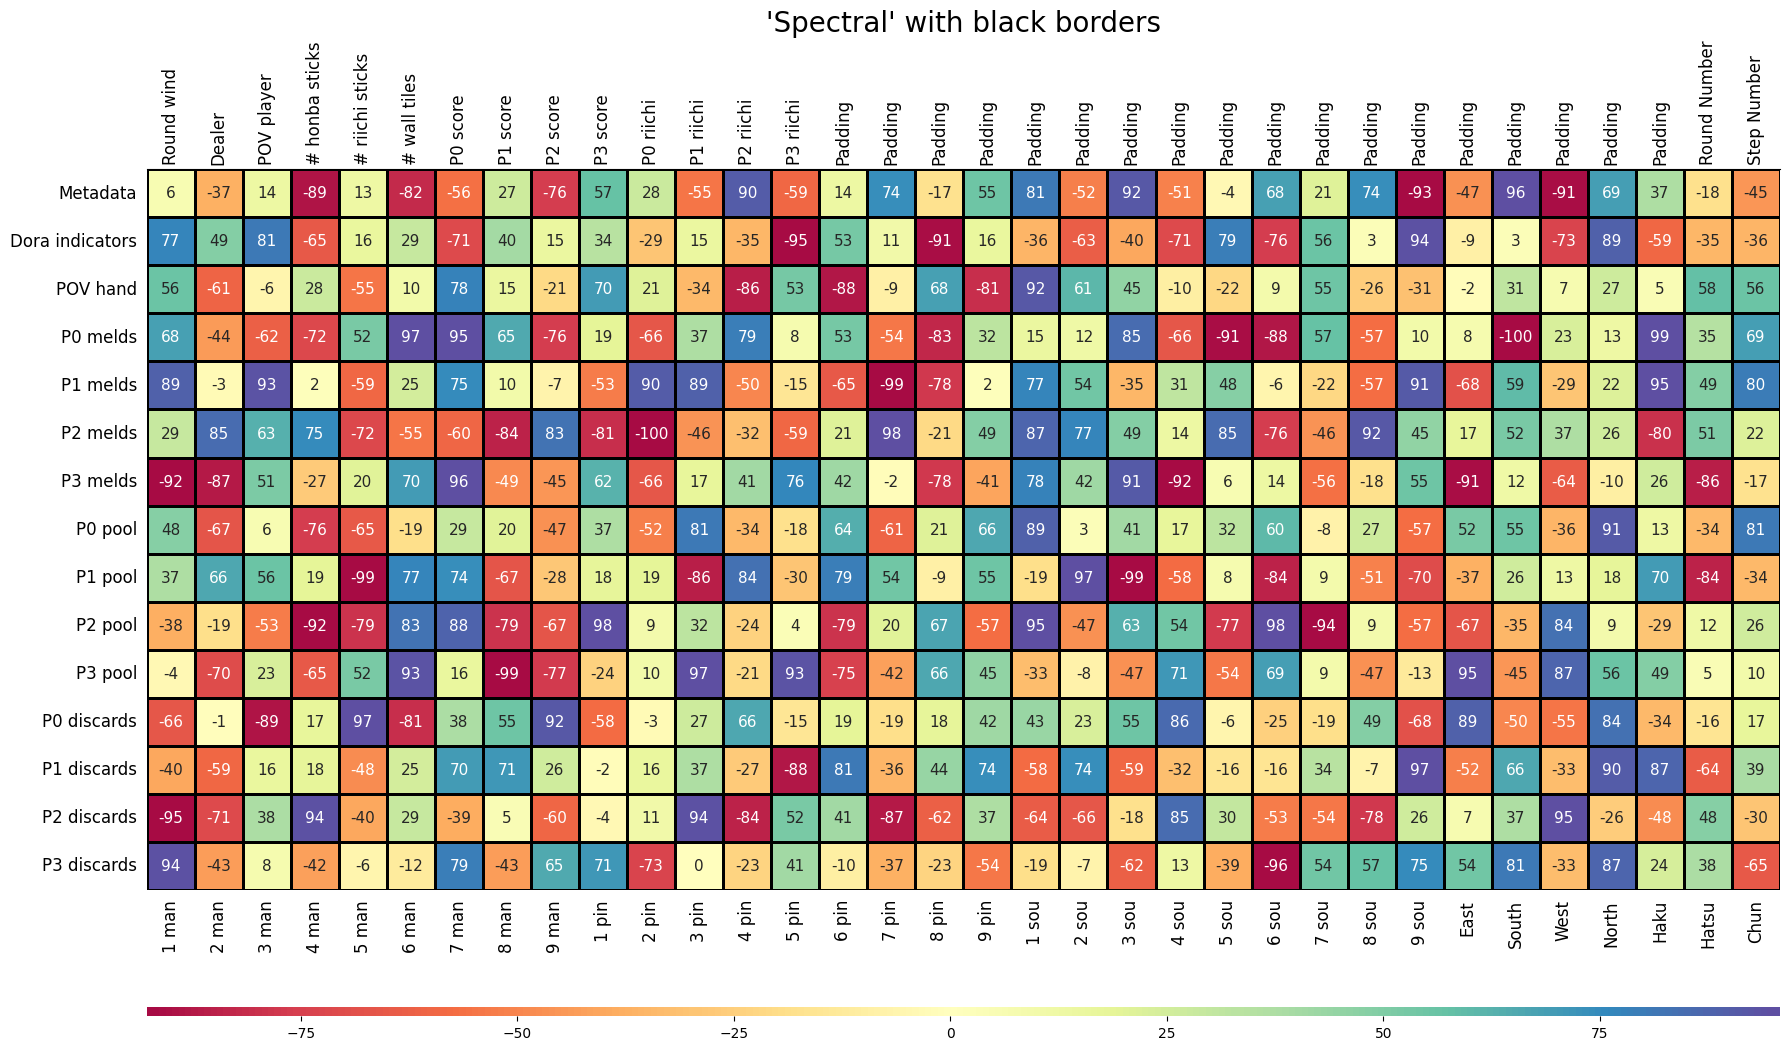

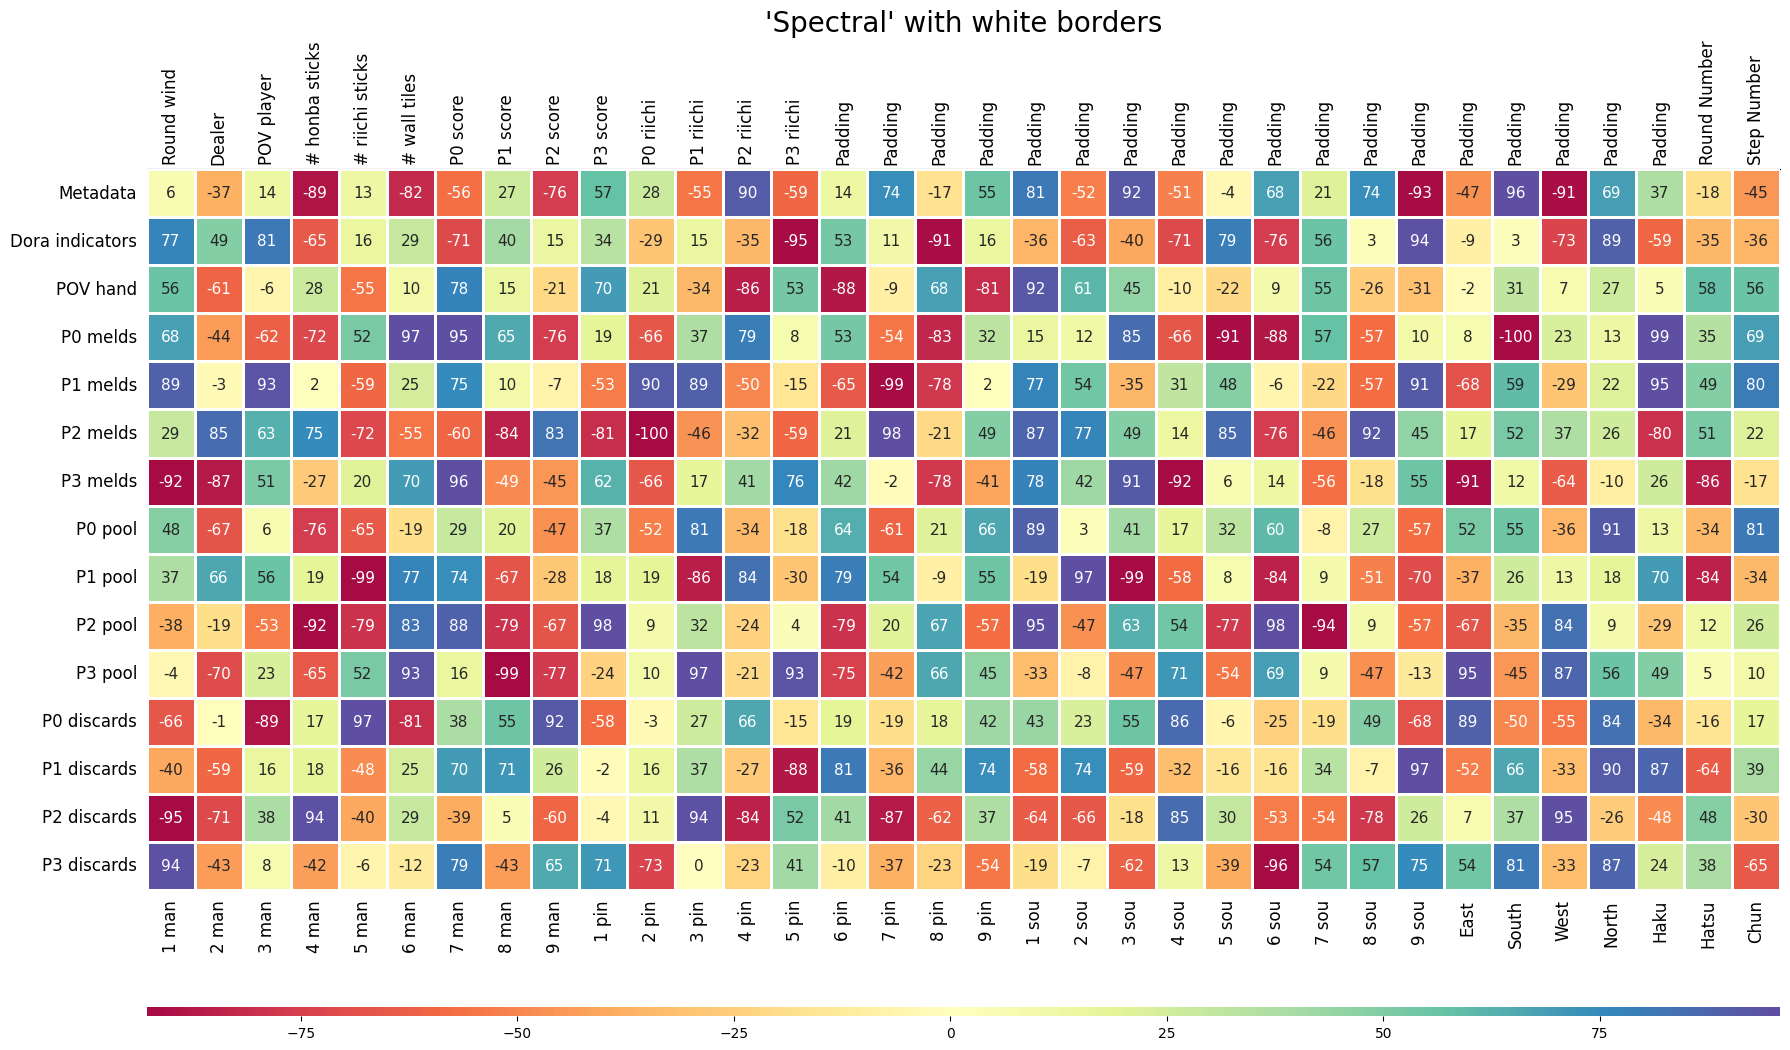

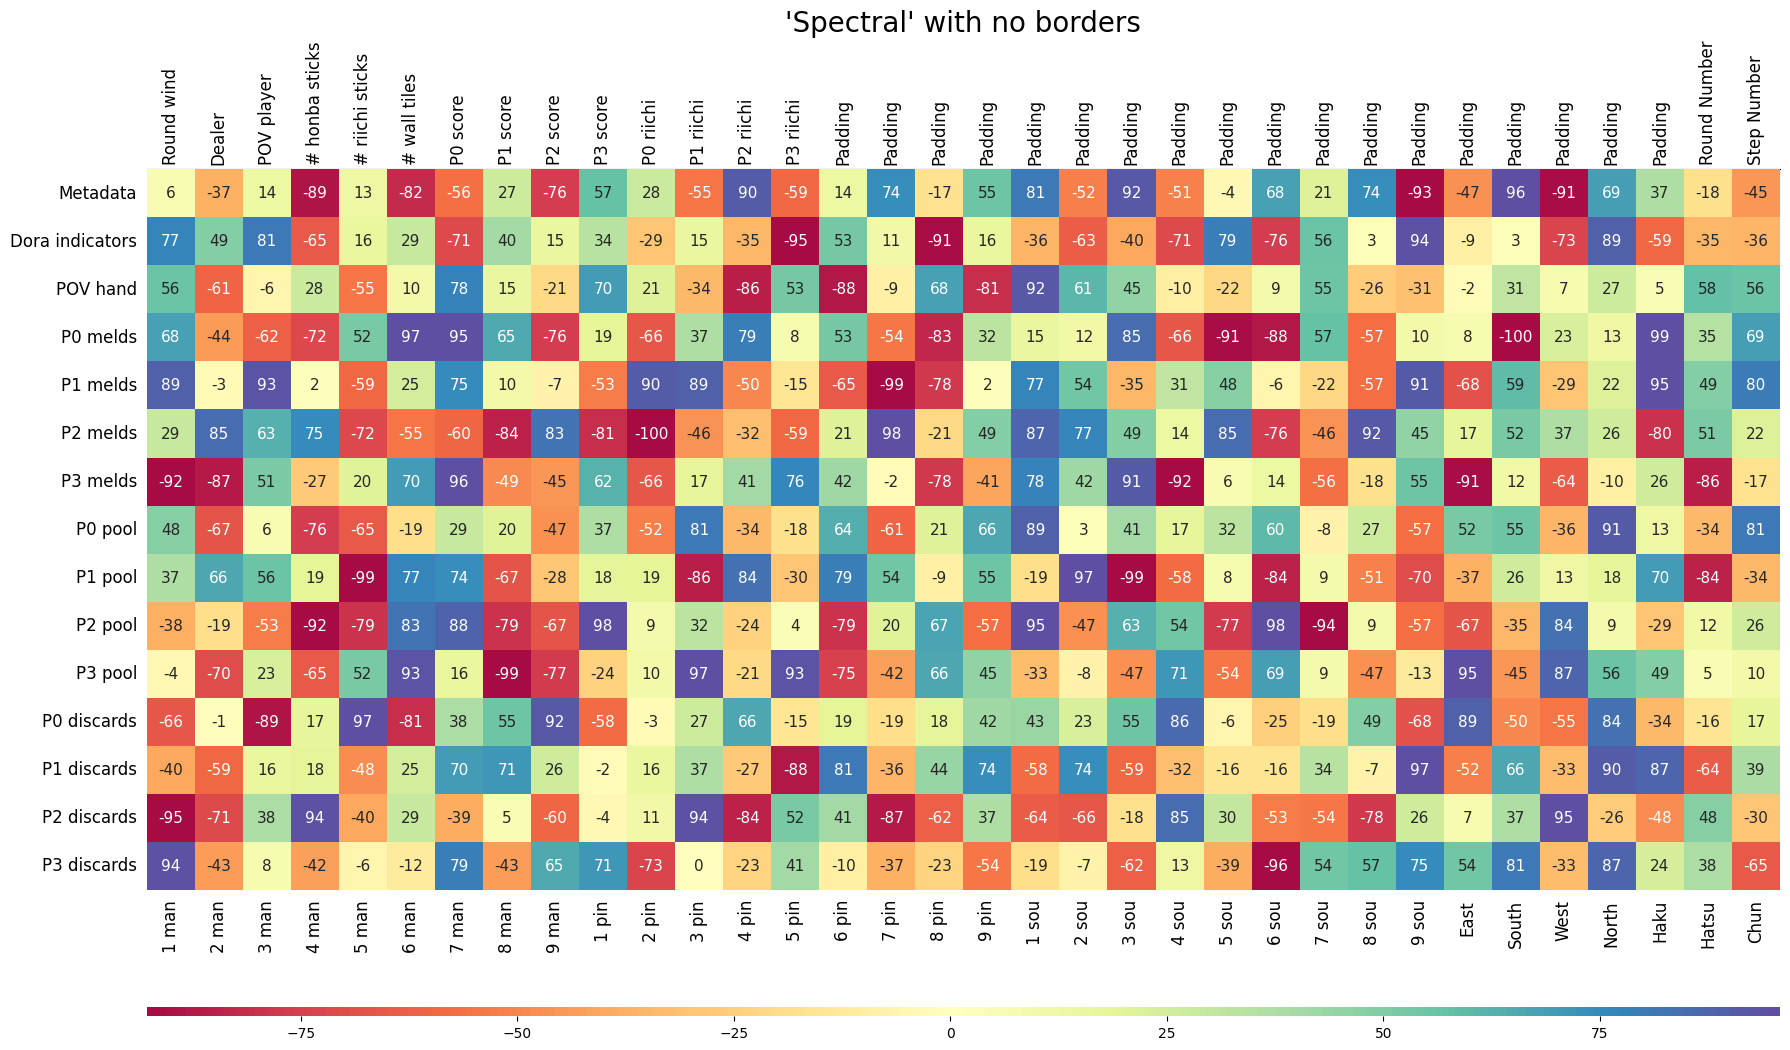

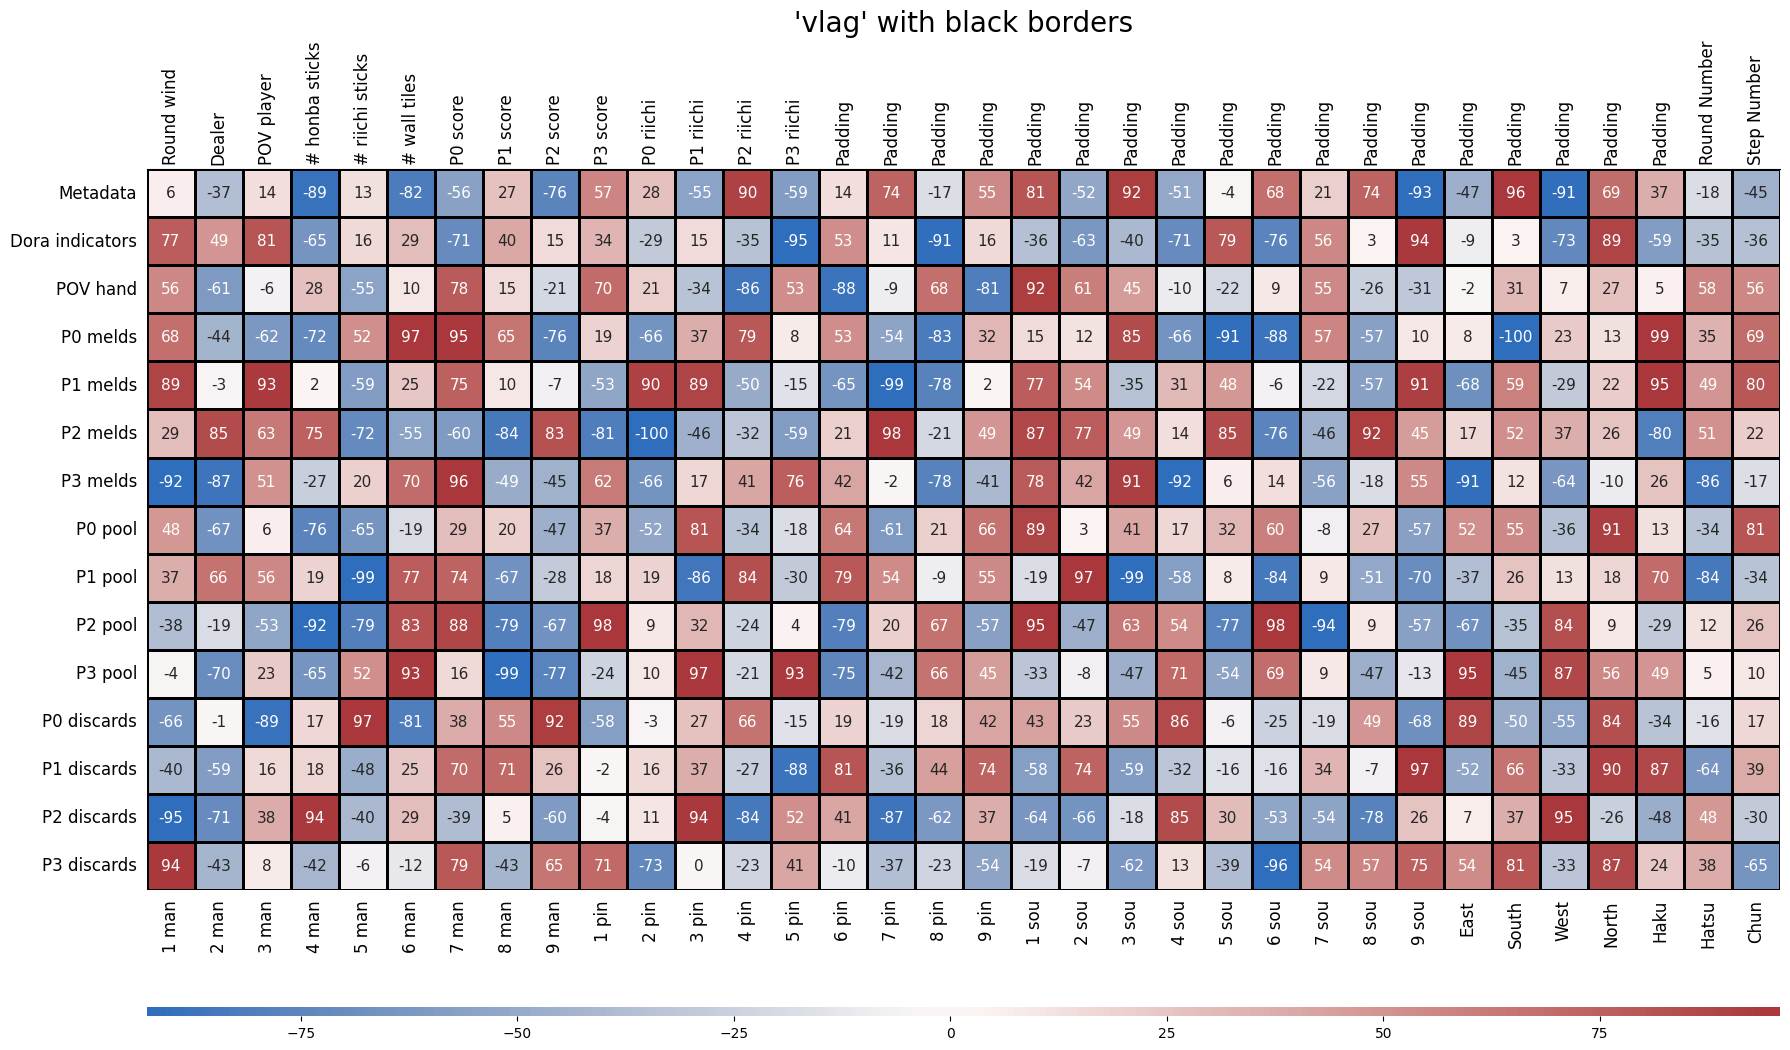

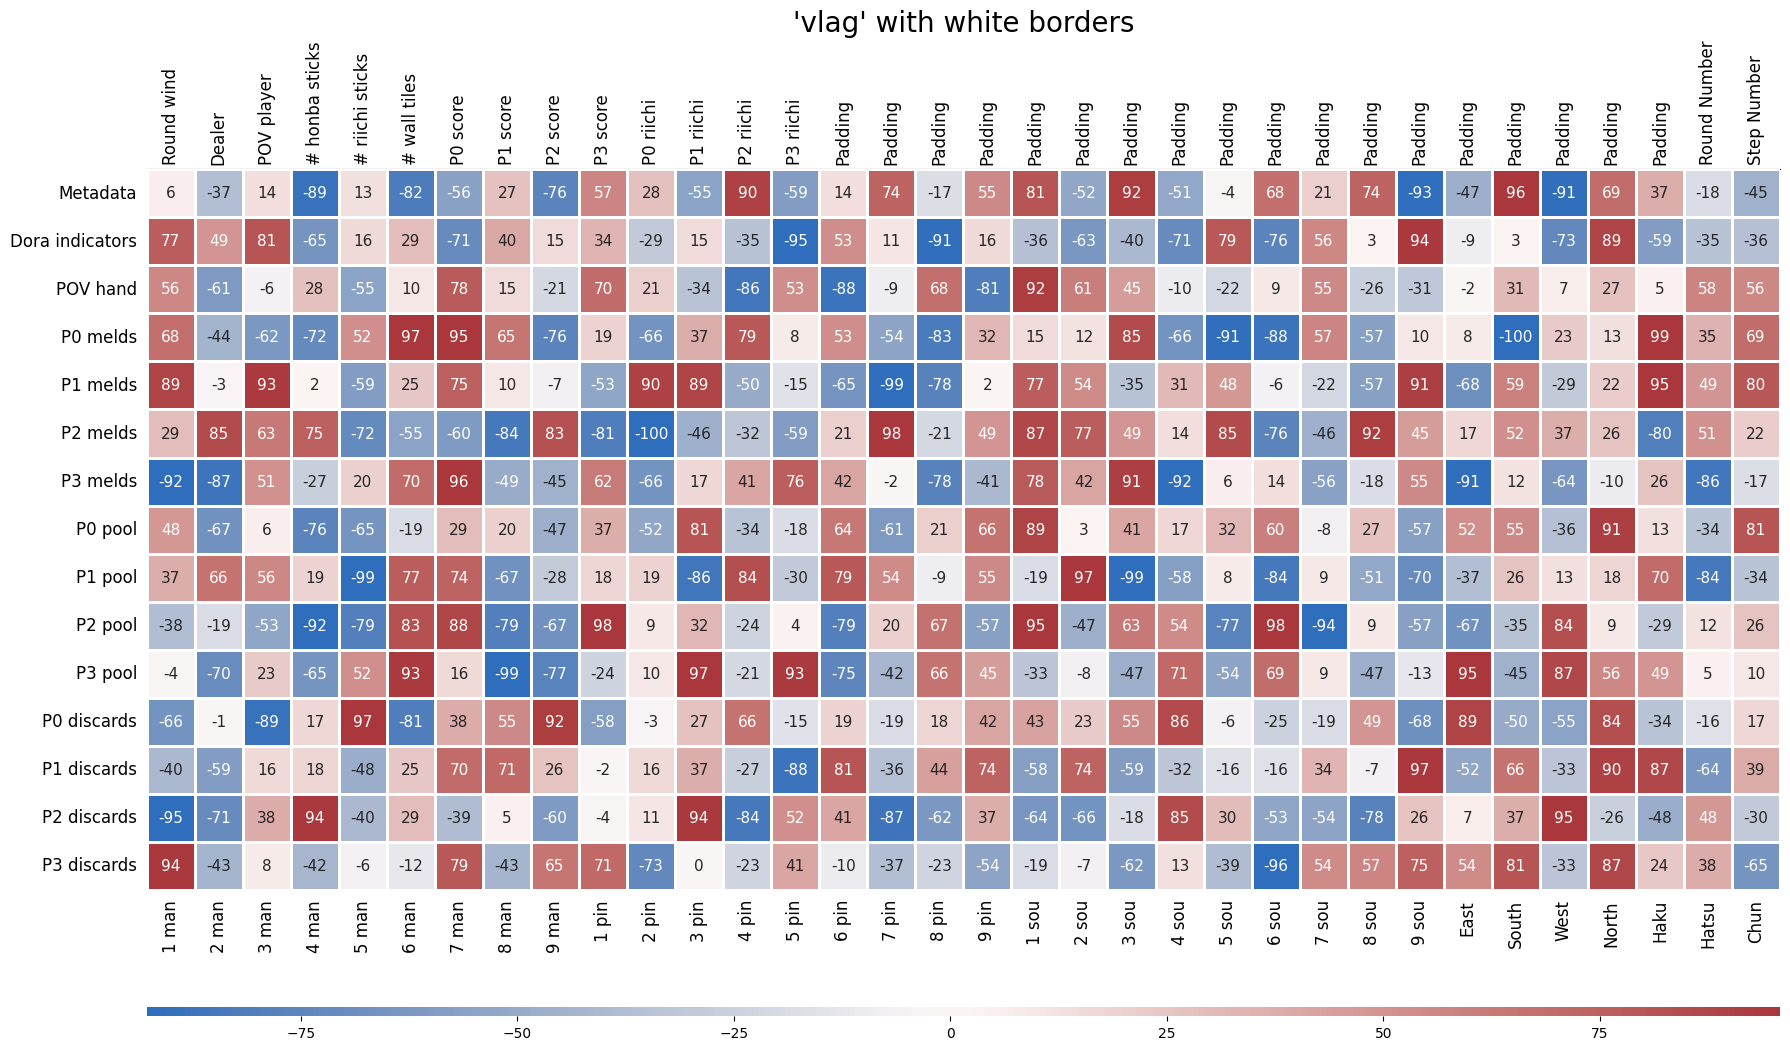

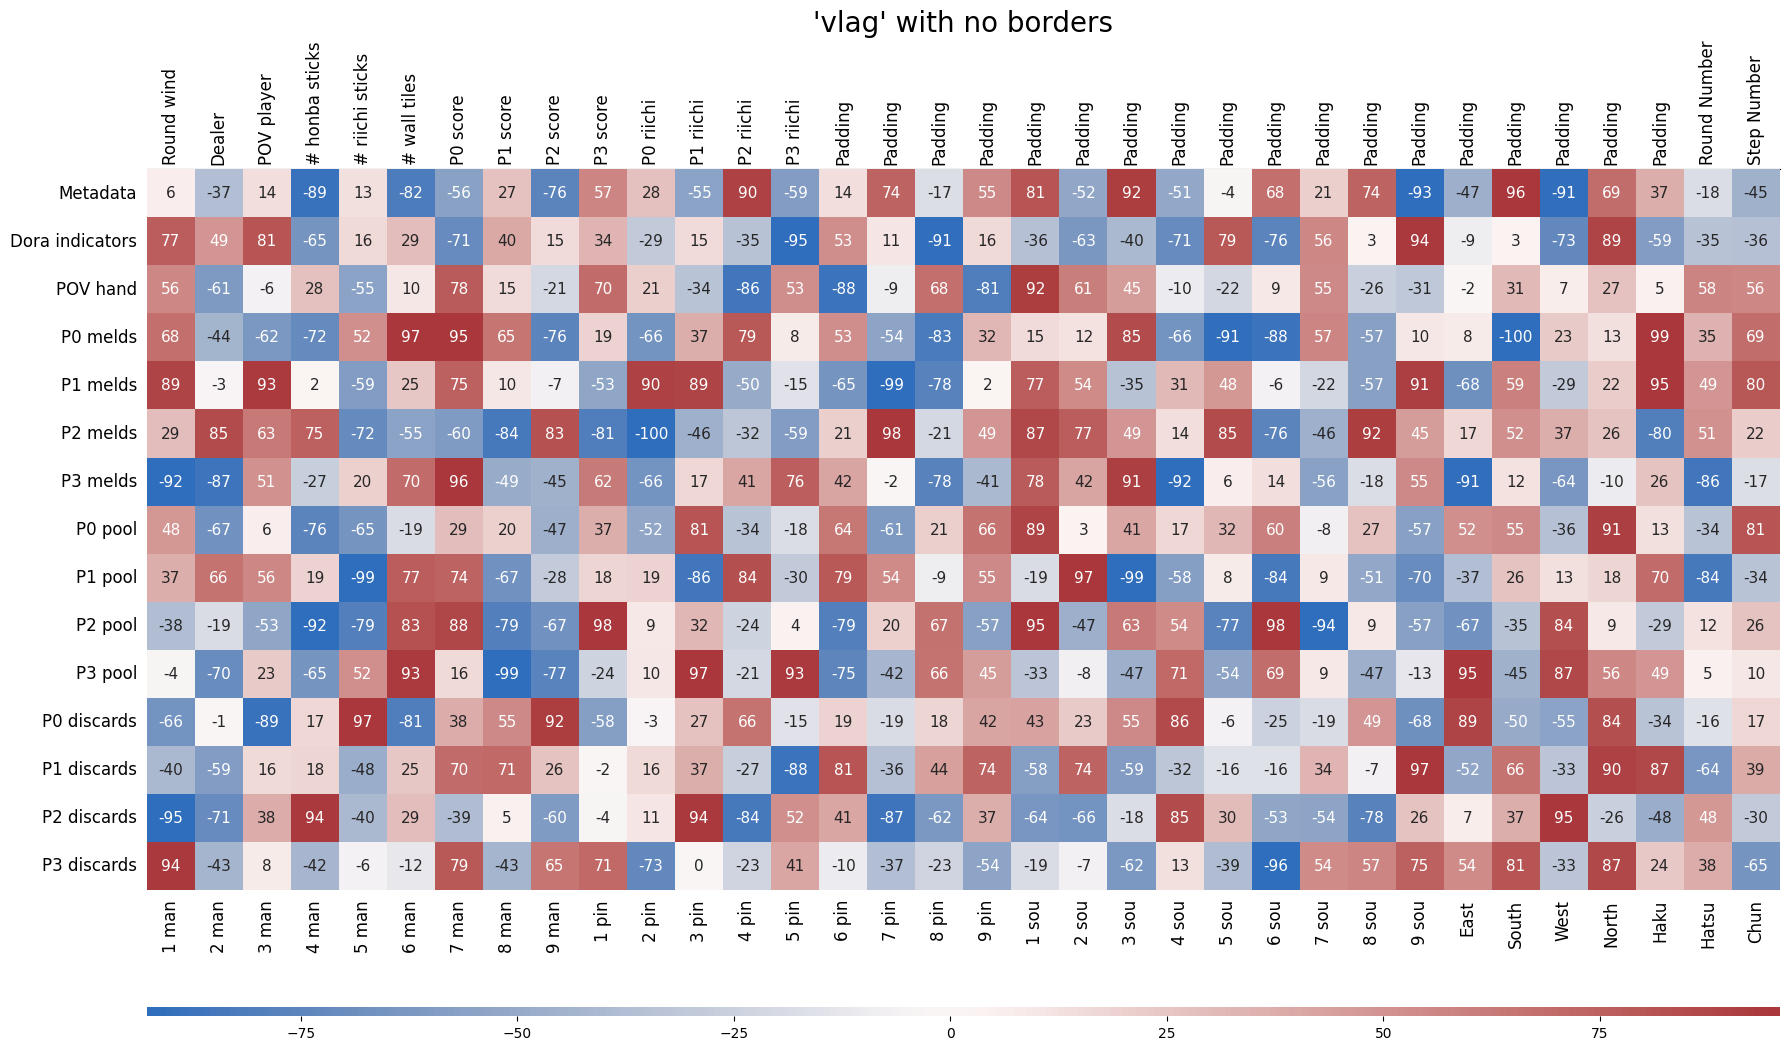

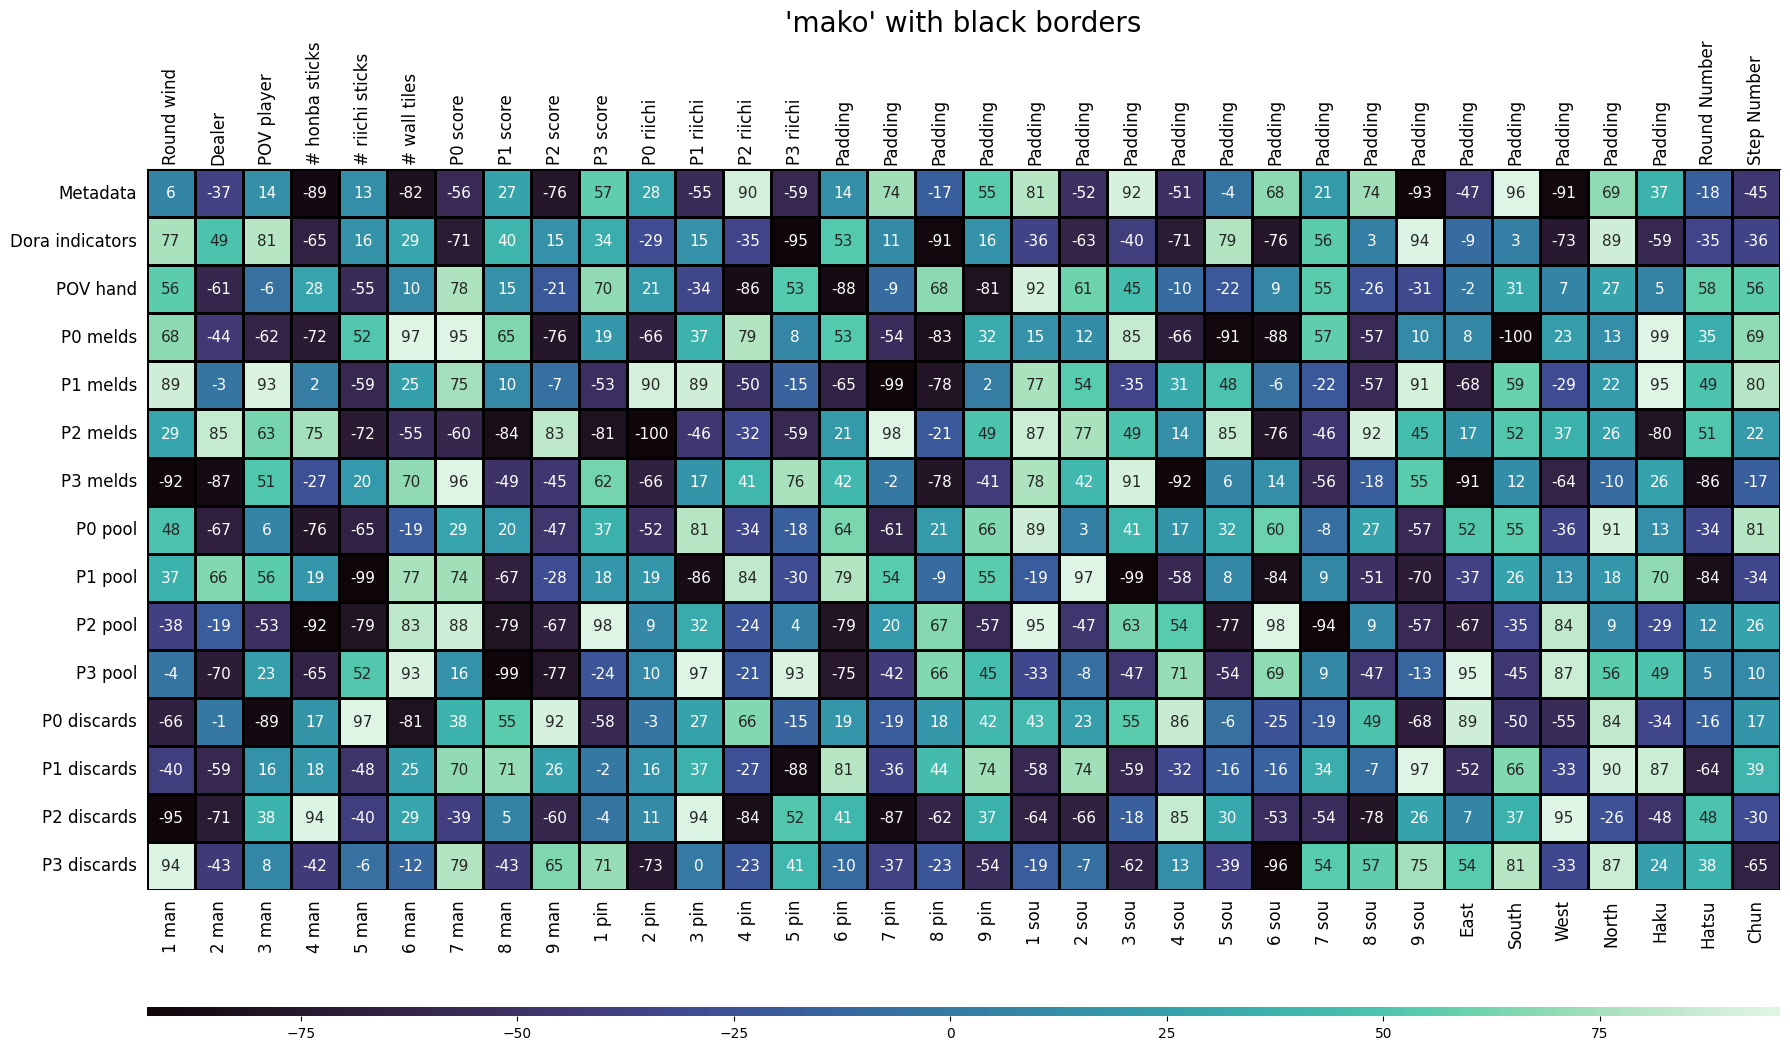

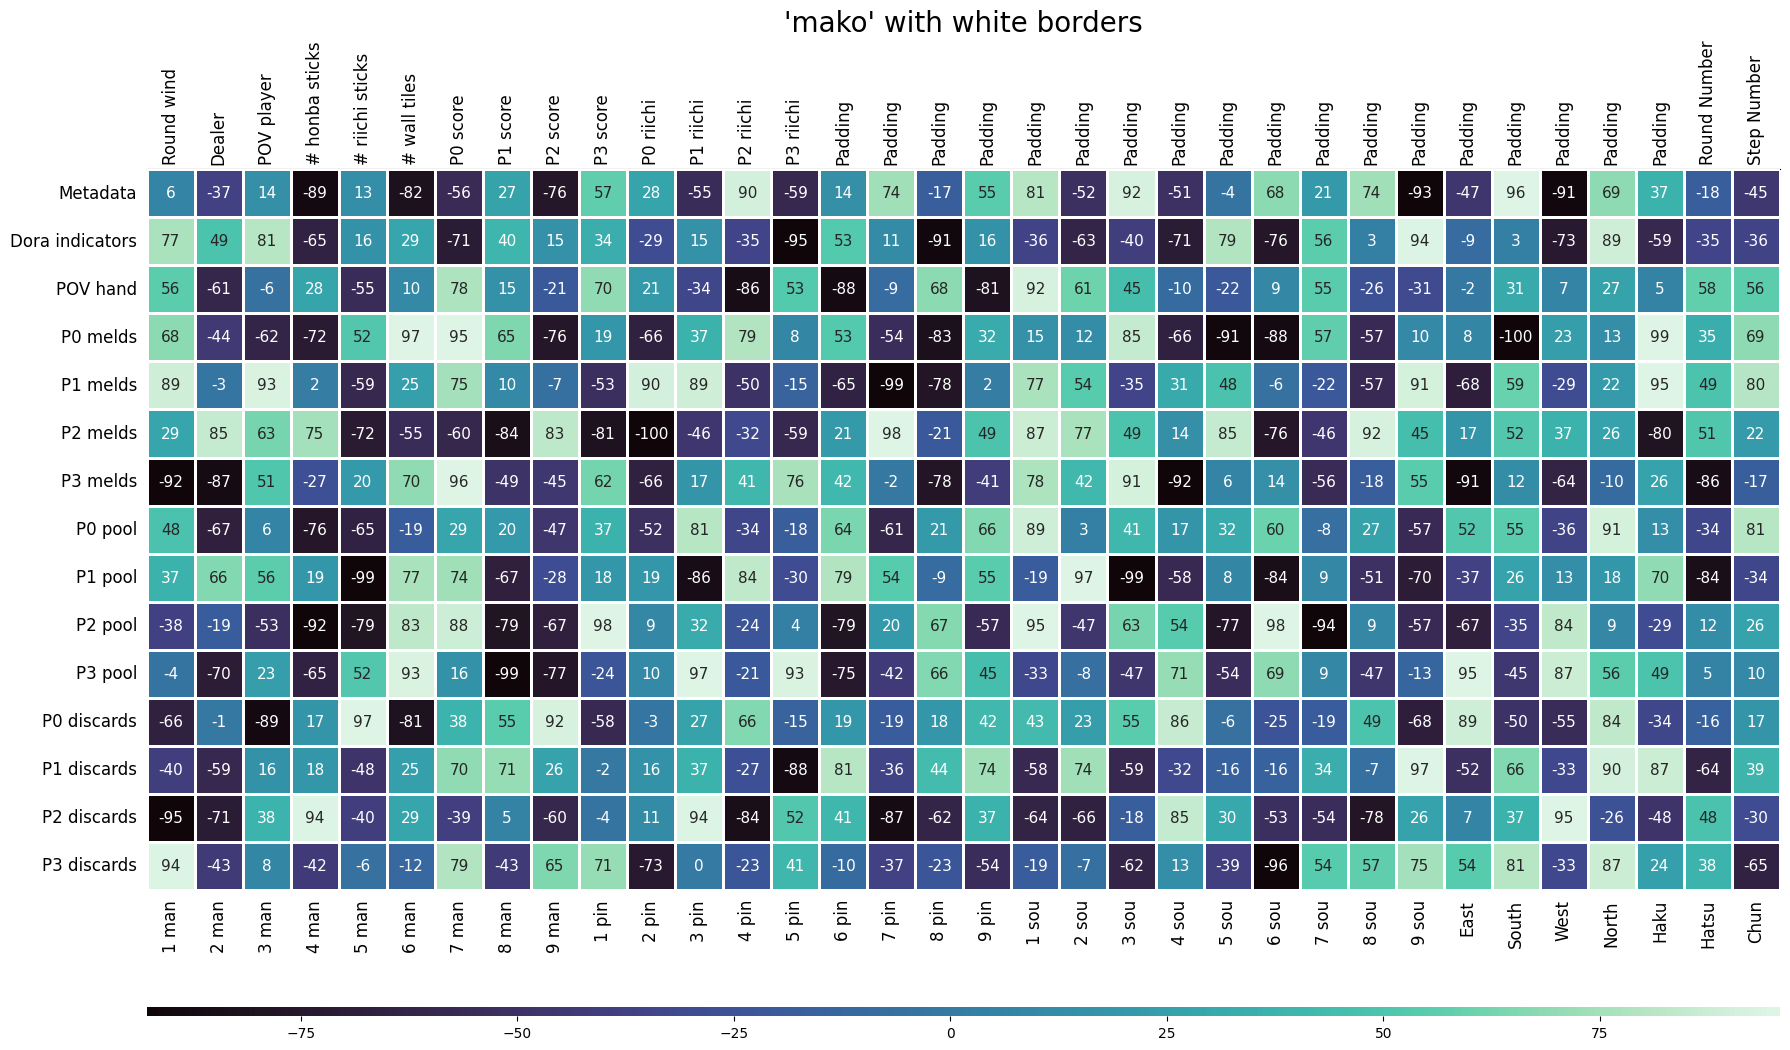

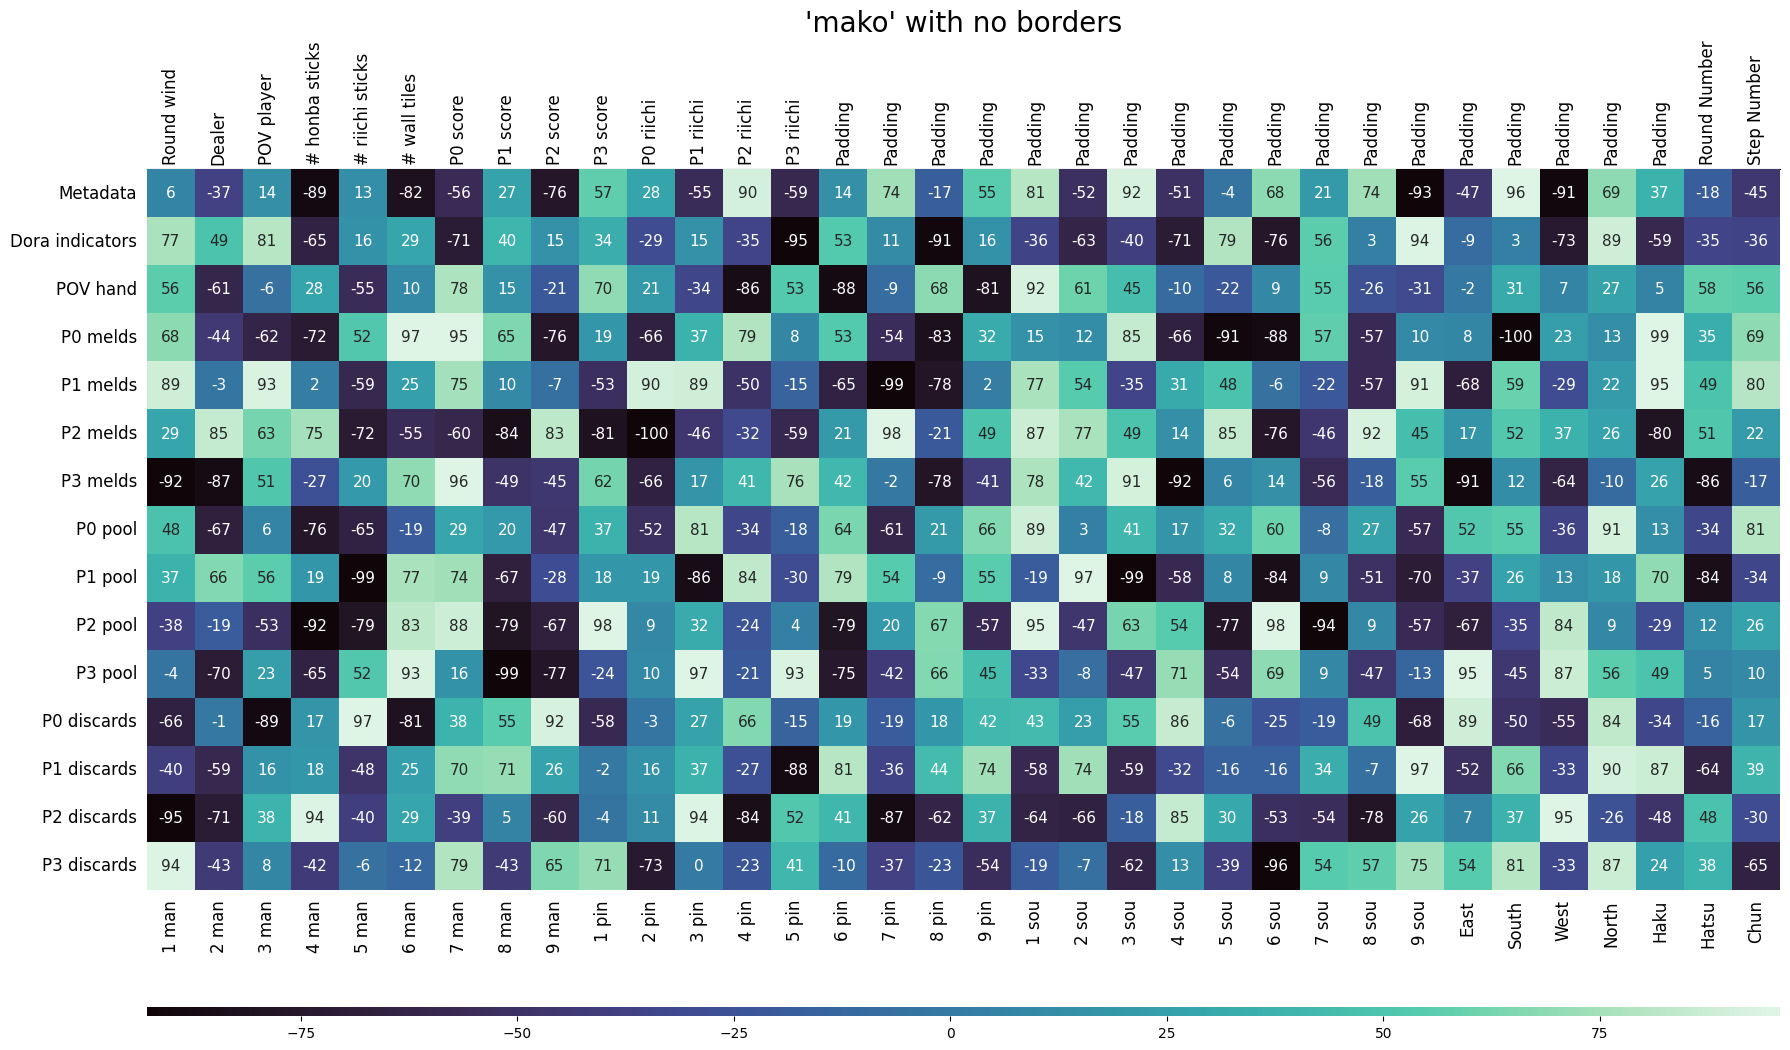

In [6]:
random_numbers_15x34 = np.random.randint(low=-100, high=100, size=510).reshape(15, 34)

# NOTE: Seaborn's colormap names are case-sensitive!
for colormap in [
    "icefire", 
    "coolwarm", 
    "Spectral", 
    "vlag", 
    "mako"
]:
    for border_color in ["black", "white", "no"]:
        generate_mahjong_heatmap(
            input_matrix=random_numbers_15x34,
            title=f"'{colormap}' with {border_color} borders",
            enable_color_bar=True,
            enable_border=border_color != "no",
            border_color=border_color if border_color != "no" else None,
            colormap=colormap,
            override_heatmap_params={
                "center": 0,
            },
            output_path=f"./resources/{colormap}_{border_color}_border"
        )